In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb

In [2]:
#d=pd.read_csv('C:/Users/ameyh/Downloads/home credit default risk/application_test.csv')

application_train = pd.read_csv('D:/case_study Exam/application_train.csv')
application_test= pd.read_csv('D:/case_study Exam/application_test.csv')
bureau = pd.read_csv('D:/case_study Exam/bureau.csv')
bureau_balance = pd.read_csv('D:/case_study Exam/bureau_balance.csv')
POS_CASH_balance = pd.read_csv('D:/case_study Exam/POS_CASH_balance.csv')
credit_card_balance = pd.read_csv('D:/case_study Exam/credit_card_balance.csv')
previous_application = pd.read_csv('D:/case_study Exam/previous_application.csv')
installments_payments = pd.read_csv('D:/case_study Exam/installments_payments.csv')

# Univariate analysis

In [3]:
print('------------main------------')
print(application_train.shape)
print(application_test.shape)
print('      ')
print('------------others------------')
print(POS_CASH_balance.shape)
print(bureau.shape)
print( bureau_balance.shape)
print(previous_application.shape)
print( installments_payments.shape)
print(credit_card_balance.shape)

------------main------------
(307511, 122)
(48744, 121)
      
------------others------------
(10001358, 8)
(1716428, 17)
(27299925, 3)
(1670214, 37)
(13605401, 8)
(3840312, 23)


In [4]:
application_train.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [5]:
application_test.describe()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count   48744.000000  48744.000000      4.874400e+04  4.874400e+04   
mean   277796.676350      0.397054      1.784318e+05  5.167404e+05   
std    103169.547296      0.709047      1.015226e+05  3.653970e+05   
min    100001.000000      0.000000      2.694150e+04  4.500000e+04   
25%    188557.750000      0.000000      1.125000e+05  2.606400e+05   
50%    277549.000000      0.000000      1.575000e+05  4.500000e+05   
75%    367555.500000      1.000000      2.250000e+05  6.750000e+05   
max    456250.000000     20.000000      4.410000e+06  2.245500e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count   48720.000000     4.874400e+04                48744.000000   
mean    29426.240209     4.626188e+05                    0.021226   
std     16016.368315     3.367102e+05                    0.014428   
min      2295.000000     4.500000e+04                    0.000253   
25%     17973.000000     2.250000e+05                    0.010006   
50%     26199.000000     3.960000e+05                    0.018850   
75%     37390.500000     6.300000e+05                    0.028663   
max    180576.000000     2.245500e+06                    0.072508   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  FLAG_DOCUMENT_18  \
count  48744.000000   48744.000000       48744.000000  ...      48744.000000   
mean  -16068.084605   67485.366322       -4967.652716  ...          0.001559   
std     4325.900393  144348.507136        3552.612035  ...          0.039456   
min   -25195.000000  -17463.000000      -23722.000000  ...          0.000000   
25%   -19637.000000   -2910.000000       -7459.250000  ...          0.000000   
50%   -15785.000000   -1293.000000       -4490.000000  ...          0.000000   
75%   -12496.000000    -296.000000       -1901.000000  ...          0.000000   
max    -7338.000000  365243.000000           0.000000  ...          1.000000   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count           48744.0           48744.0           48744.0   
mean                0.0               0.0               0.0   
std                 0.0               0.0               0.0   
min                 0.0               0.0               0.0   
25%                 0.0               0.0               0.0   
50%                 0.0               0.0               0.0   
75%                 0.0               0.0               0.0   
max                 0.0               0.0               0.0   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count                42695.000000               42695.000000   
mean                     0.002108                   0.001803   
std                      0.046373                   0.046132   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   2.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count                42695.000000               42695.000000   
mean                     0.002787                   0.009299   
std                      0.054037                   0.110924   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   6.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count               42695.000000                42695.000000  
mean                    0.546902                    1.983769  
std                     0.693305                    1.838873  
min                     0.000000                    0.000000  

In [6]:
application_train.median()

C:\Users\HP\AppData\Local\Temp\ipykernel_14320\2948222158.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  application_train.median()


SK_ID_CURR                    278202.0
TARGET                             0.0
CNT_CHILDREN                       0.0
AMT_INCOME_TOTAL              147150.0
AMT_CREDIT                    513531.0
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY          0.0
AMT_REQ_CREDIT_BUREAU_WEEK         0.0
AMT_REQ_CREDIT_BUREAU_MON          0.0
AMT_REQ_CREDIT_BUREAU_QRT          0.0
AMT_REQ_CREDIT_BUREAU_YEAR         1.0
Length: 106, dtype: float64

In [7]:
application_test.median()

C:\Users\HP\AppData\Local\Temp\ipykernel_14320\3750140821.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  application_test.median()


SK_ID_CURR                    277549.0
CNT_CHILDREN                       0.0
AMT_INCOME_TOTAL              157500.0
AMT_CREDIT                    450000.0
AMT_ANNUITY                    26199.0
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY          0.0
AMT_REQ_CREDIT_BUREAU_WEEK         0.0
AMT_REQ_CREDIT_BUREAU_MON          0.0
AMT_REQ_CREDIT_BUREAU_QRT          0.0
AMT_REQ_CREDIT_BUREAU_YEAR         2.0
Length: 105, dtype: float64

In [8]:
application_train.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<AxesSubplot:ylabel='Frequency'>

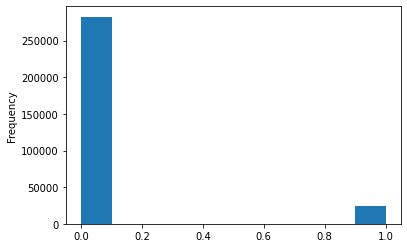

In [9]:
application_train['TARGET'].astype(int).plot.hist()

In [10]:
application_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [11]:
application_train.nunique()

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
Length: 122, dtype: int64

In [12]:
application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [13]:
application_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

In [14]:
bureau.head()


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [15]:
bureau_balance.head()


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [16]:
POS_CASH_balance.head()


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [17]:
credit_card_balance.head()


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

In [18]:
previous_application.head()


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [19]:
installments_payments.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

# Missing Data

In [20]:
def find_missing(data):
    # number of missing values
    count_missing = data.isnull().sum().values
    #data=data.iloc[]
    # total records
    total = data.shape[0]
    # percentage of missing
    ratio_missing = 100*count_missing/total
    # return a dataframe to show: feature name, # of missing and % of missing
    app_train=pd.DataFrame(data={'missing_count':count_missing, 'missing_perc':ratio_missing}, index=data.columns.values)
    app_train=app_train.sort_values(by=['missing_perc'],ascending=False)
    app_train=app_train[app_train.iloc[:, 1] != 0]
    return app_train


find_missing(application_train).head(900)

missing_count  missing_perc
COMMONAREA_MEDI                  214865     69.872297
COMMONAREA_AVG                   214865     69.872297
COMMONAREA_MODE                  214865     69.872297
NONLIVINGAPARTMENTS_MODE         213514     69.432963
NONLIVINGAPARTMENTS_AVG          213514     69.432963
...                                 ...           ...
EXT_SOURCE_2                        660      0.214626
AMT_GOODS_PRICE                     278      0.090403
AMT_ANNUITY                          12      0.003902
CNT_FAM_MEMBERS                       2      0.000650
DAYS_LAST_PHONE_CHANGE                1      0.000325

[67 rows x 2 columns]

In [21]:
application_train
find_missing(application_test)

missing_count  missing_perc
COMMONAREA_AVG                    33495     68.716150
COMMONAREA_MODE                   33495     68.716150
COMMONAREA_MEDI                   33495     68.716150
NONLIVINGAPARTMENTS_AVG           33347     68.412523
NONLIVINGAPARTMENTS_MODE          33347     68.412523
...                                 ...           ...
OBS_30_CNT_SOCIAL_CIRCLE             29      0.059495
OBS_60_CNT_SOCIAL_CIRCLE             29      0.059495
DEF_60_CNT_SOCIAL_CIRCLE             29      0.059495
AMT_ANNUITY                          24      0.049237
EXT_SOURCE_2                          8      0.016412

[64 rows x 2 columns]

In [22]:
find_missing(bureau)

missing_count  missing_perc
AMT_ANNUITY                   1226791     71.473490
AMT_CREDIT_MAX_OVERDUE        1124488     65.513264
DAYS_ENDDATE_FACT              633653     36.916958
AMT_CREDIT_SUM_LIMIT           591780     34.477415
AMT_CREDIT_SUM_DEBT            257669     15.011932
DAYS_CREDIT_ENDDATE            105553      6.149573
AMT_CREDIT_SUM                     13      0.000757

In [23]:
find_missing(bureau_balance)


Empty DataFrame
Columns: [missing_count, missing_perc]
Index: []

In [24]:
find_missing(POS_CASH_balance) 


missing_count  missing_perc
CNT_INSTALMENT_FUTURE          26087      0.260835
CNT_INSTALMENT                 26071      0.260675

In [25]:
find_missing(credit_card_balance)


missing_count  missing_perc
AMT_PAYMENT_CURRENT                767988     19.998063
AMT_DRAWINGS_ATM_CURRENT           749816     19.524872
CNT_DRAWINGS_POS_CURRENT           749816     19.524872
AMT_DRAWINGS_OTHER_CURRENT         749816     19.524872
AMT_DRAWINGS_POS_CURRENT           749816     19.524872
CNT_DRAWINGS_OTHER_CURRENT         749816     19.524872
CNT_DRAWINGS_ATM_CURRENT           749816     19.524872
CNT_INSTALMENT_MATURE_CUM          305236      7.948208
AMT_INST_MIN_REGULARITY            305236      7.948208

In [26]:
find_missing(previous_application)


missing_count  missing_perc
RATE_INTEREST_PRIVILEGED         1664263     99.643698
RATE_INTEREST_PRIMARY            1664263     99.643698
AMT_DOWN_PAYMENT                  895844     53.636480
RATE_DOWN_PAYMENT                 895844     53.636480
NAME_TYPE_SUITE                   820405     49.119754
NFLAG_INSURED_ON_APPROVAL         673065     40.298129
DAYS_TERMINATION                  673065     40.298129
DAYS_LAST_DUE                     673065     40.298129
DAYS_LAST_DUE_1ST_VERSION         673065     40.298129
DAYS_FIRST_DUE                    673065     40.298129
DAYS_FIRST_DRAWING                673065     40.298129
AMT_GOODS_PRICE                   385515     23.081773
AMT_ANNUITY                       372235     22.286665
CNT_PAYMENT                       372230     22.286366
PRODUCT_COMBINATION                  346      0.020716
AMT_CREDIT                             1      0.000060

In [27]:
find_missing(installments_payments)

missing_count  missing_perc
DAYS_ENTRY_PAYMENT           2905      0.021352
AMT_PAYMENT                  2905      0.021352

# Types of columns

In [28]:
application_train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [29]:
application_test.dtypes

SK_ID_CURR                      int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 121, dtype: object

In [30]:
cat_features = { "NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
                        "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
                        "NAME_HOUSING_TYPE", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE",
                        "FLAG_PHONE", "FLAG_EMAIL", "OCCUPATION_TYPE", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
                        "WEEKDAY_APPR_PROCESS_START", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION",
                        "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "ORGANIZATION_TYPE", 
                        "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", 
                        "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", 
                        "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", 
                        "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", 
                        "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"}
application_train["TARGET"] = application_train["TARGET"].astype("category")
for feature in cat_features:
    application_train[feature] = application_train[feature].astype("category")
    application_test[feature] = application_test[feature].astype("category")

# Distribution

array([[<AxesSubplot:title={'center':'SK_ID_CURR'}>,
        <AxesSubplot:title={'center':'CNT_CHILDREN'}>,
        <AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>,
        <AxesSubplot:title={'center':'AMT_ANNUITY'}>,
        <AxesSubplot:title={'center':'AMT_GOODS_PRICE'}>,
        <AxesSubplot:title={'center':'REGION_POPULATION_RELATIVE'}>,
        <AxesSubplot:title={'center':'DAYS_BIRTH'}>],
       [<AxesSubplot:title={'center':'DAYS_EMPLOYED'}>,
        <AxesSubplot:title={'center':'DAYS_REGISTRATION'}>,
        <AxesSubplot:title={'center':'DAYS_ID_PUBLISH'}>,
        <AxesSubplot:title={'center':'OWN_CAR_AGE'}>,
        <AxesSubplot:title={'center':'CNT_FAM_MEMBERS'}>,
        <AxesSubplot:title={'center':'HOUR_APPR_PROCESS_START'}>,
        <AxesSubplot:title={'center':'EXT_SOURCE_1'}>,
        <AxesSubplot:title={'center':'EXT_SOURCE_2'}>],
       [<AxesSubplot:title={'center':'EXT_SOURCE_3'}>,
        <AxesSubplot:title=

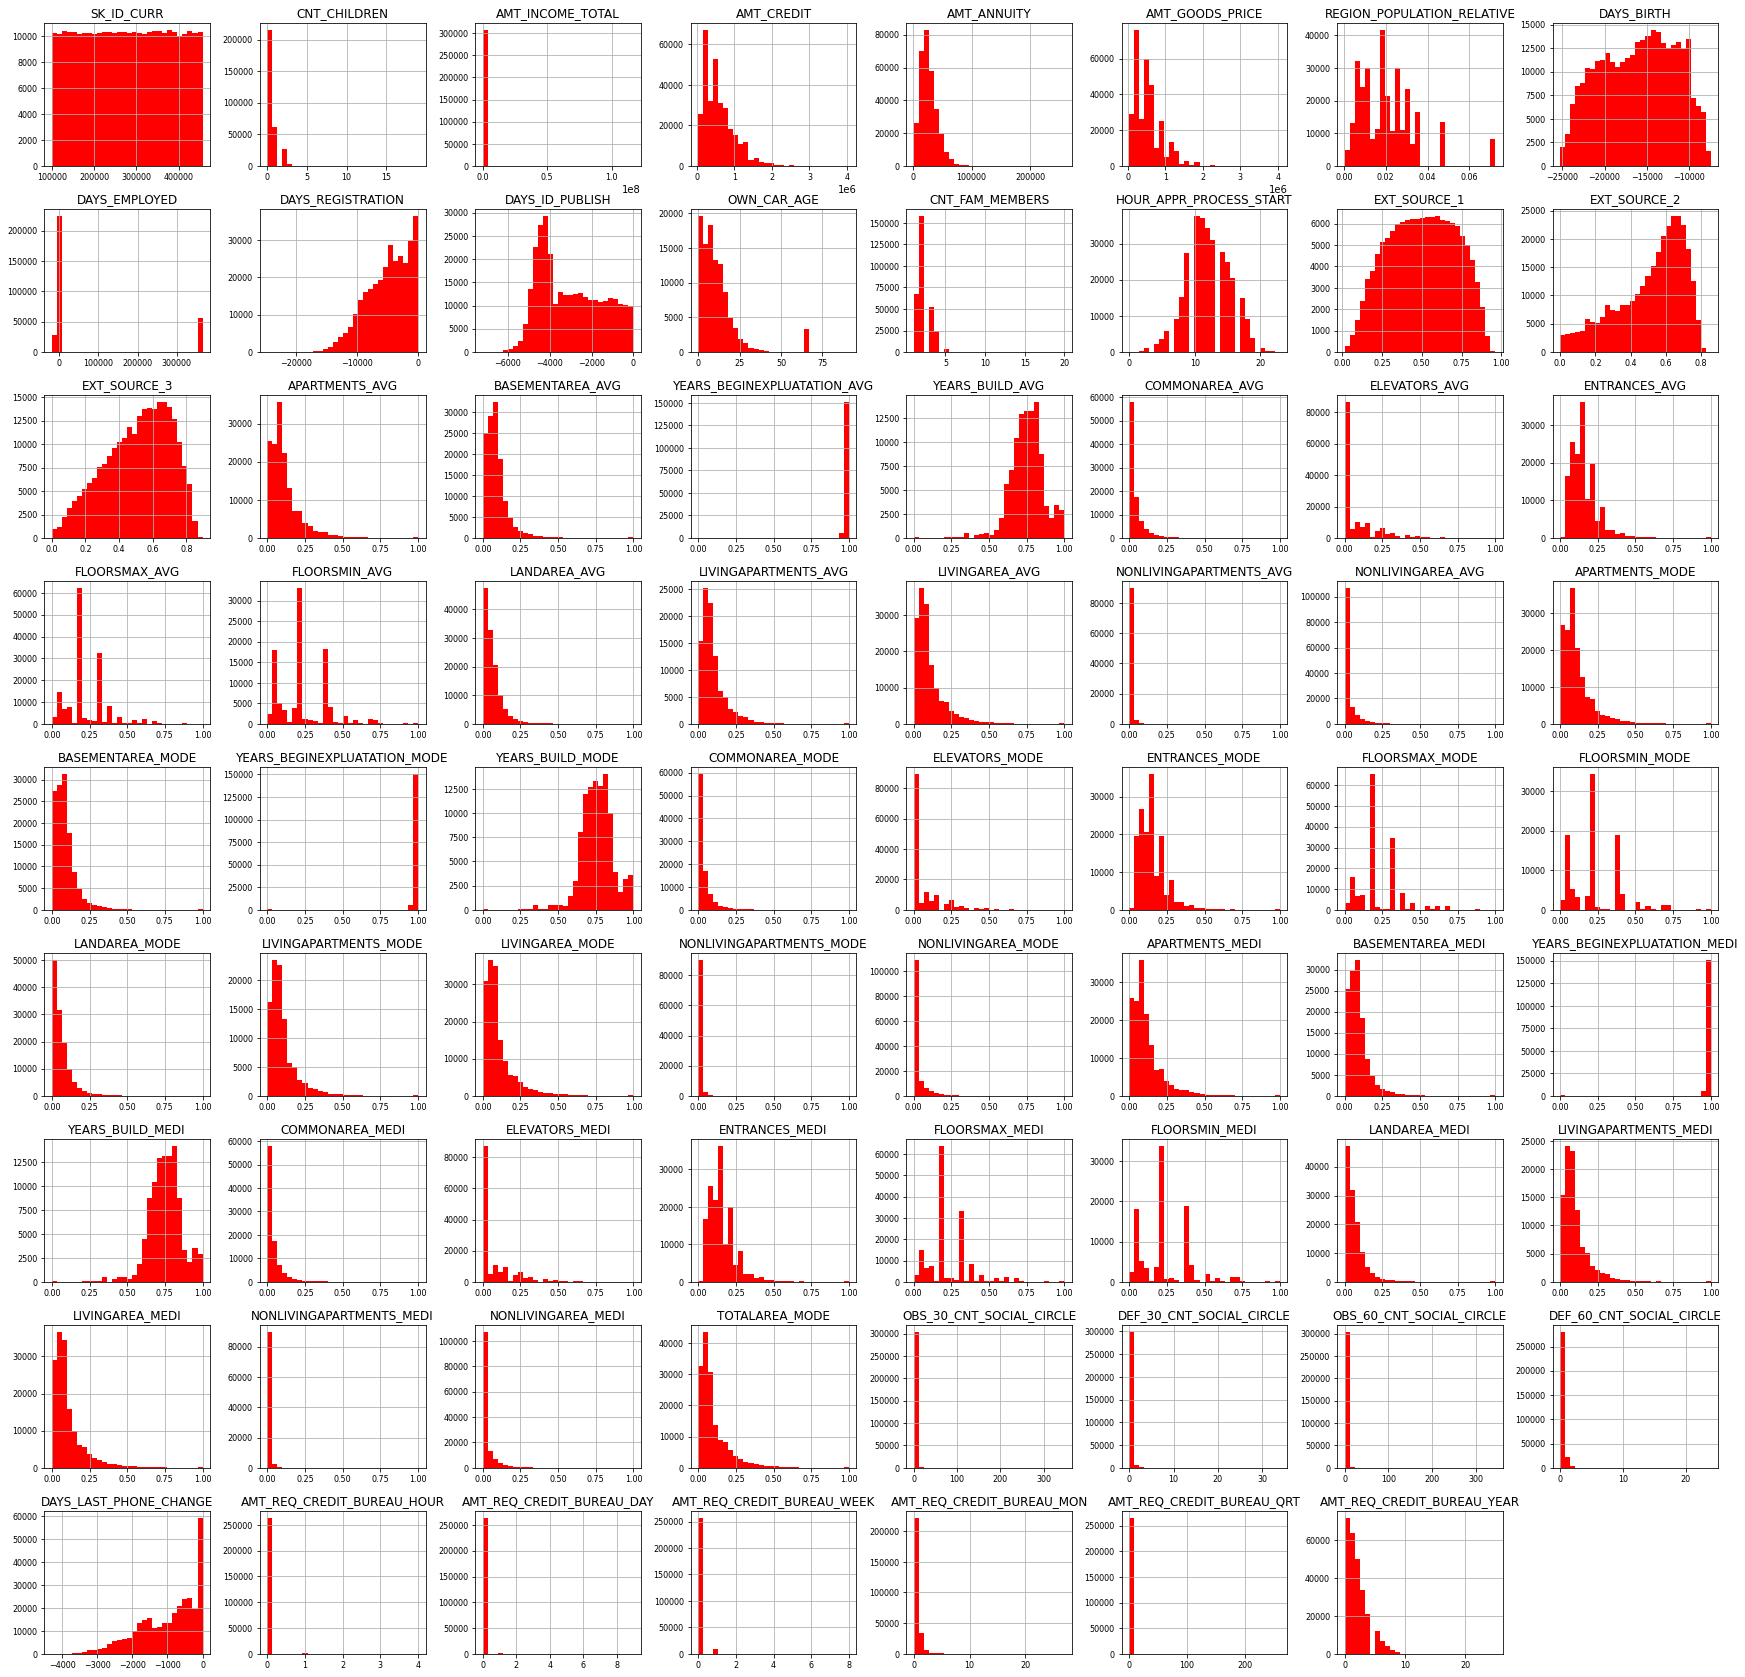

In [31]:
num_features = application_train.select_dtypes(include = ['float64', 'int64']).columns
application_train[num_features].hist(figsize=(30, 30), color = 'r', bins=30, xlabelsize=8, ylabelsize=8)

array([[<AxesSubplot:title={'center':'SK_ID_CURR'}>,
        <AxesSubplot:title={'center':'CNT_CHILDREN'}>,
        <AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>,
        <AxesSubplot:title={'center':'AMT_ANNUITY'}>,
        <AxesSubplot:title={'center':'AMT_GOODS_PRICE'}>,
        <AxesSubplot:title={'center':'REGION_POPULATION_RELATIVE'}>,
        <AxesSubplot:title={'center':'DAYS_BIRTH'}>],
       [<AxesSubplot:title={'center':'DAYS_EMPLOYED'}>,
        <AxesSubplot:title={'center':'DAYS_REGISTRATION'}>,
        <AxesSubplot:title={'center':'DAYS_ID_PUBLISH'}>,
        <AxesSubplot:title={'center':'OWN_CAR_AGE'}>,
        <AxesSubplot:title={'center':'CNT_FAM_MEMBERS'}>,
        <AxesSubplot:title={'center':'HOUR_APPR_PROCESS_START'}>,
        <AxesSubplot:title={'center':'EXT_SOURCE_1'}>,
        <AxesSubplot:title={'center':'EXT_SOURCE_2'}>],
       [<AxesSubplot:title={'center':'EXT_SOURCE_3'}>,
        <AxesSubplot:title=

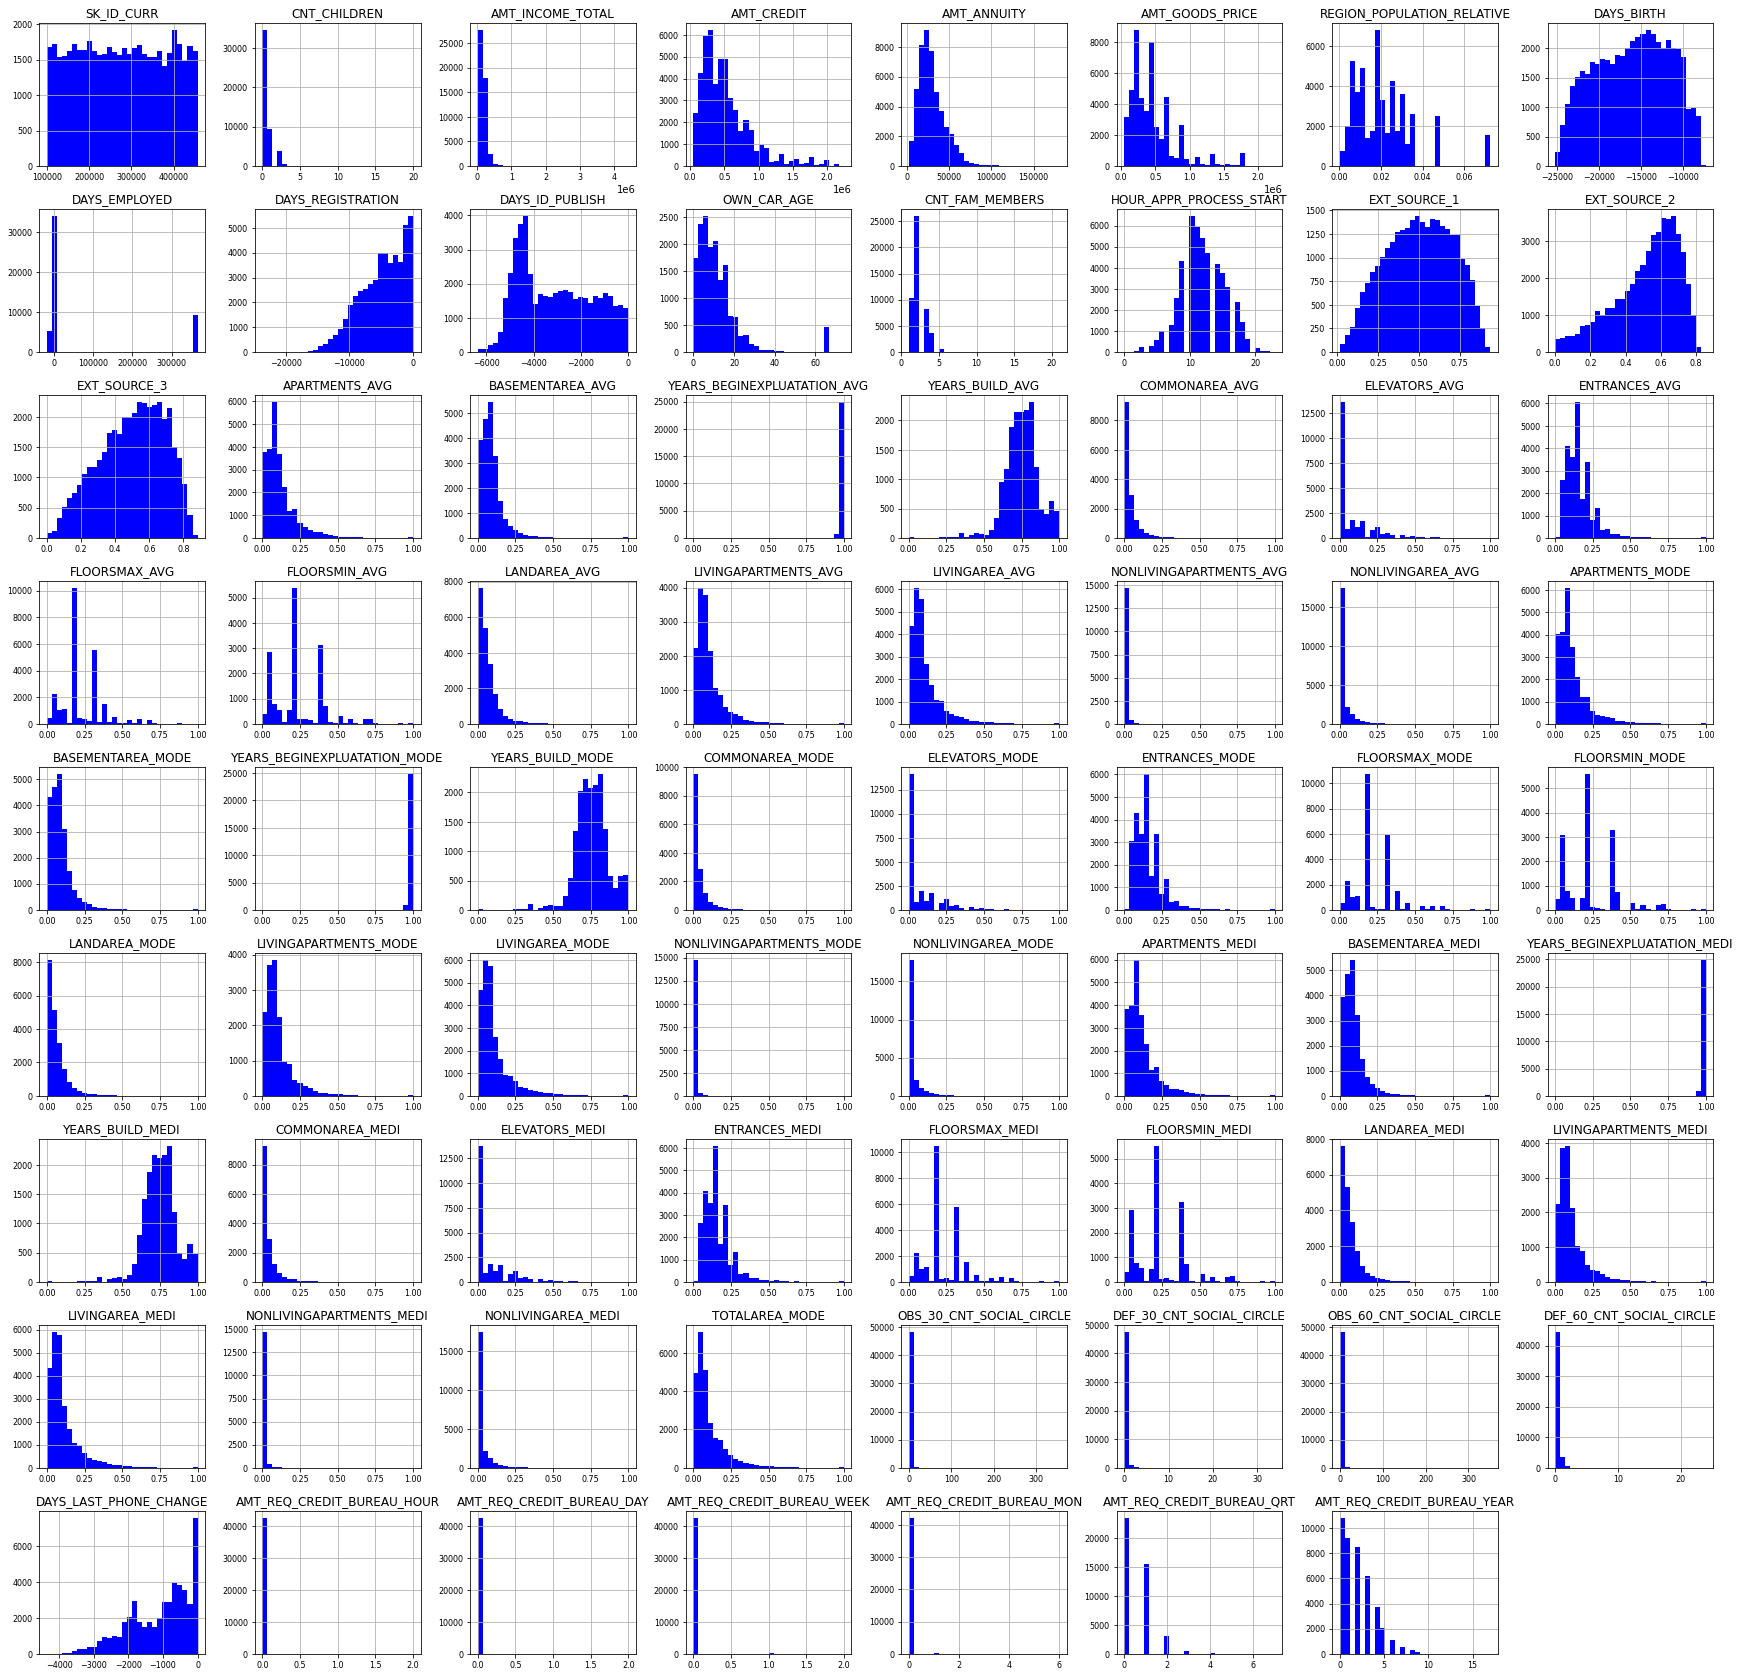

In [32]:
application_test[num_features].hist(figsize=(30, 30), color = 'b', bins=30, xlabelsize=8, ylabelsize=8)

# Outliers

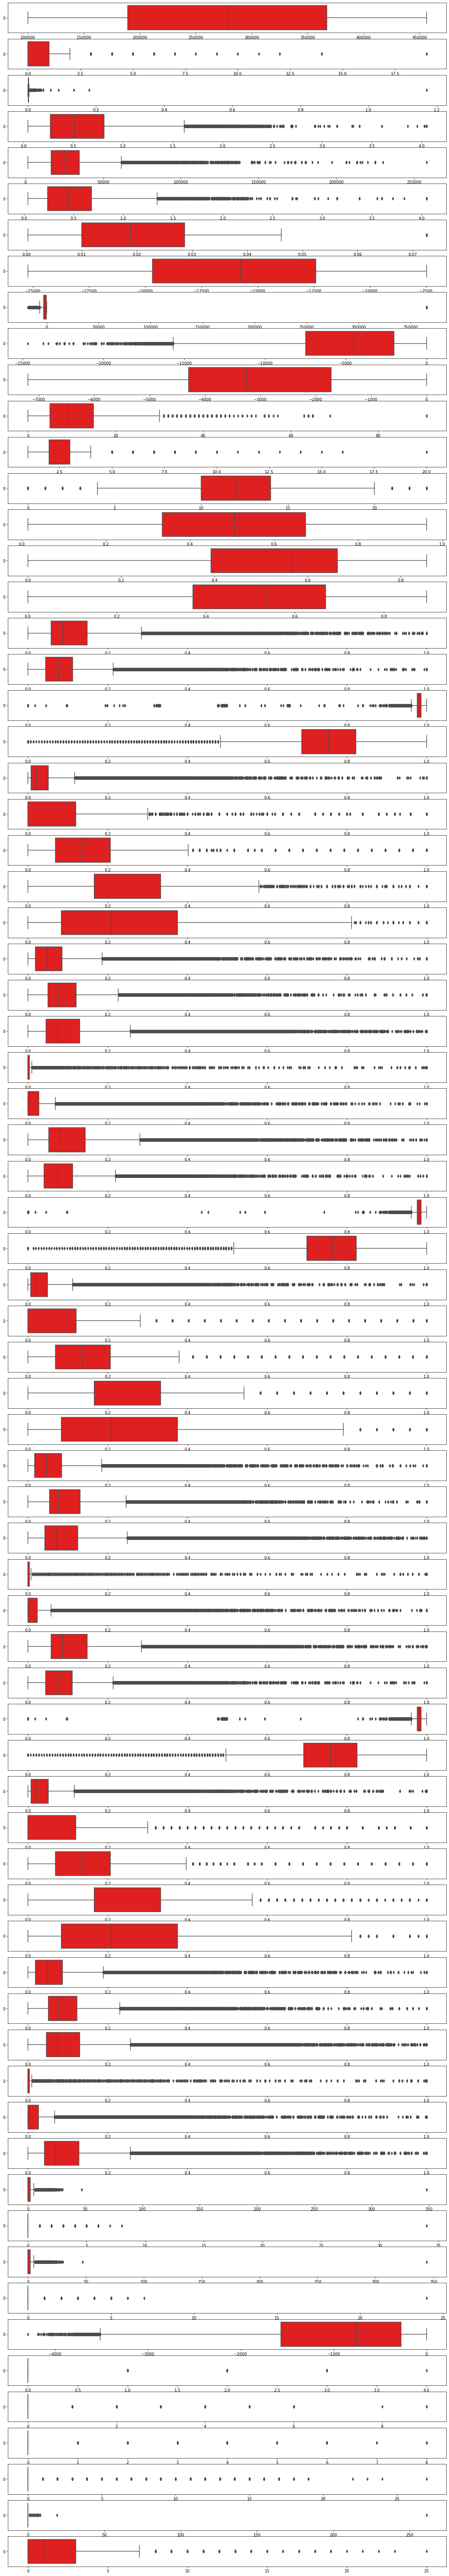

In [33]:
fig, axes = plt.subplots(nrows=len(num_features), ncols=1)
fig.set_size_inches(20, 120)
for i, col in enumerate(num_features):
    sns.boxplot(data=application_train[col], orient='h', ax=axes[i], color='r')
plt.show()

In [34]:
application_train.describe()

SK_ID_CURR   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  307511.000000  307511.000000      3.075110e+05  3.075110e+05   
mean   278180.518577       0.417052      1.687979e+05  5.990260e+05   
std    102790.175348       0.722121      2.371231e+05  4.024908e+05   
min    100002.000000       0.000000      2.565000e+04  4.500000e+04   
25%    189145.500000       0.000000      1.125000e+05  2.700000e+05   
50%    278202.000000       0.000000      1.471500e+05  5.135310e+05   
75%    367142.500000       1.000000      2.025000e+05  8.086500e+05   
max    456255.000000      19.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  307499.000000     3.072330e+05               307511.000000   
mean    27108.573909     5.383962e+05                    0.020868   
std     14493.737315     3.694465e+05                    0.013831   
min      1615.500000     4.050000e+04                    0.000290   
25%     16524.000000     2.385000e+05                    0.010006   
50%     24903.000000     4.500000e+05                    0.018850   
75%     34596.000000     6.795000e+05                    0.028663   
max    258025.500000     4.050000e+06                    0.072508   

          DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  \
count  307511.000000  307511.000000      307511.000000  ...   
mean   -16036.995067   63815.045904       -4986.120328  ...   
std      4363.988632  141275.766519        3522.886321  ...   
min    -25229.000000  -17912.000000      -24672.000000  ...   
25%    -19682.000000   -2760.000000       -7479.500000  ...   
50%    -15750.000000   -1213.000000       -4504.000000  ...   
75%    -12413.000000    -289.000000       -2010.000000  ...   
max     -7489.000000  365243.000000           0.000000  ...   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   0.143421                  1.405292   
std                    0.446698                  2.379803   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  2.000000   
max                   34.000000                344.000000   

       DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
count             306490.000000           307510.000000   
mean                   0.100049             -962.858788   
std                    0.362291              826.808487   
min                    0.000000            -4292.000000   
25%                    0.000000            -1570.000000   
50%                    0.000000             -757.000000   
75%                    0.000000             -274.000000   
max                   24.000000                0.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max      

In [35]:
application_train[cat_features].describe()

C:\Users\HP\AppData\Local\Temp\ipykernel_14320\1345862137.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  application_train[cat_features].describe()


FLAG_DOCUMENT_12            NAME_EDUCATION_TYPE  \
count             307511                         307511   
unique                 2                              5   
top                    0  Secondary / secondary special   
freq              307509                         218391   

        REG_CITY_NOT_LIVE_CITY  REGION_RATING_CLIENT  FLAG_PHONE  \
count                   307511                307511      307511   
unique                       2                     3           2   
top                          0                     2           0   
freq                    283472                226984      221080   

        FLAG_DOCUMENT_4  FLAG_DOCUMENT_21 OCCUPATION_TYPE NAME_INCOME_TYPE  \
count            307511            307511          211120           307511   
unique                2                 2              18                8   
top                   0                 0        Laborers          Working   
freq             307486            307408           55186           158774   

        FLAG_DOCUMENT_6  ...  FLAG_MOBIL LIVE_CITY_NOT_WORK_CITY  \
count            307511  ...      307511                  307511   
unique                2  ...           2                       2   
top                   0  ...           1                       0   
freq             280433  ...      307510                  252296   

        FLAG_DOCUMENT_13 FLAG_DOCUMENT_20  FLAG_DOCUMENT_5 FLAG_DOCUMENT_19  \
count             307511           307511           307511           307511   
unique                 2                2                2                2   
top                    0                0                0                0   
freq              306427           307355           302863           307328   

        CODE_GENDER  FLAG_DOCUMENT_3  FLAG_DOCUMENT_8 NAME_CONTRACT_TYPE  
count        307511           307511           307511             307511  
unique            3                2                2                  2  
top               F                1                0         Cash loans  
freq         202448           218340           282487             278232  

[4 rows x 46 columns]

In [36]:
application_train.median()

C:\Users\HP\AppData\Local\Temp\ipykernel_14320\2948222158.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  application_train.median()


SK_ID_CURR                    278202.0
CNT_CHILDREN                       0.0
AMT_INCOME_TOTAL              147150.0
AMT_CREDIT                    513531.0
AMT_ANNUITY                    24903.0
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY          0.0
AMT_REQ_CREDIT_BUREAU_WEEK         0.0
AMT_REQ_CREDIT_BUREAU_MON          0.0
AMT_REQ_CREDIT_BUREAU_QRT          0.0
AMT_REQ_CREDIT_BUREAU_YEAR         1.0
Length: 71, dtype: float64

In [37]:
application_train.mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_14320\3135249399.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  application_train.mean()


SK_ID_CURR                    278180.518577
CNT_CHILDREN                       0.417052
AMT_INCOME_TOTAL              168797.919297
AMT_CREDIT                    599025.999706
AMT_ANNUITY                    27108.573909
                                  ...      
AMT_REQ_CREDIT_BUREAU_DAY          0.007000
AMT_REQ_CREDIT_BUREAU_WEEK         0.034362
AMT_REQ_CREDIT_BUREAU_MON          0.267395
AMT_REQ_CREDIT_BUREAU_QRT          0.265474
AMT_REQ_CREDIT_BUREAU_YEAR         1.899974
Length: 71, dtype: float64

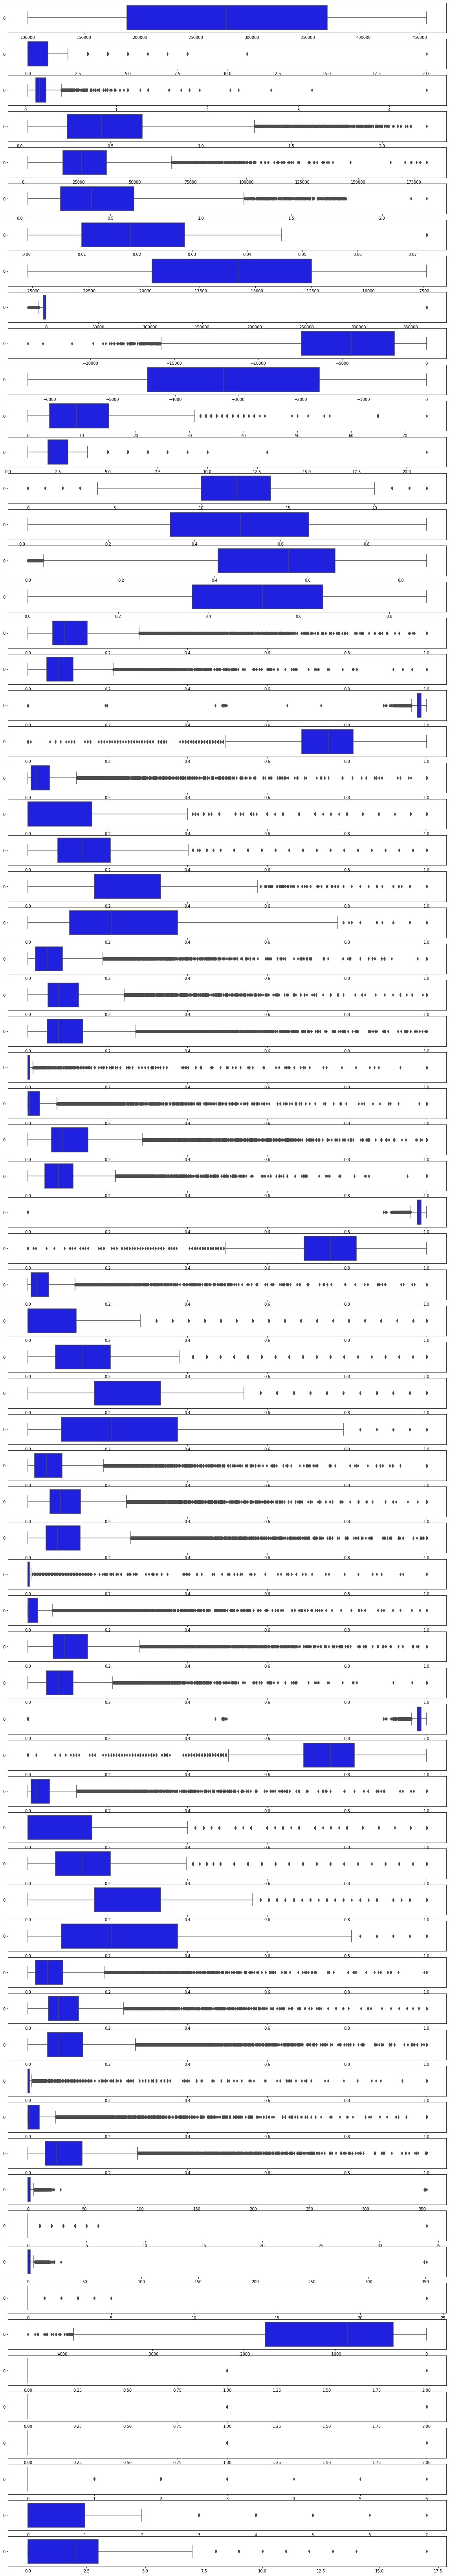

In [38]:
fig, axes = plt.subplots(nrows=len(num_features), ncols=1)
fig.set_size_inches(20, 120)
for i, col in enumerate(num_features):
    sns.boxplot(data=application_test[col], orient='h', ax=axes[i], color='b')
plt.show()

In [39]:
application_test.describe()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count   48744.000000  48744.000000      4.874400e+04  4.874400e+04   
mean   277796.676350      0.397054      1.784318e+05  5.167404e+05   
std    103169.547296      0.709047      1.015226e+05  3.653970e+05   
min    100001.000000      0.000000      2.694150e+04  4.500000e+04   
25%    188557.750000      0.000000      1.125000e+05  2.606400e+05   
50%    277549.000000      0.000000      1.575000e+05  4.500000e+05   
75%    367555.500000      1.000000      2.250000e+05  6.750000e+05   
max    456250.000000     20.000000      4.410000e+06  2.245500e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count   48720.000000     4.874400e+04                48744.000000   
mean    29426.240209     4.626188e+05                    0.021226   
std     16016.368315     3.367102e+05                    0.014428   
min      2295.000000     4.500000e+04                    0.000253   
25%     17973.000000     2.250000e+05                    0.010006   
50%     26199.000000     3.960000e+05                    0.018850   
75%     37390.500000     6.300000e+05                    0.028663   
max    180576.000000     2.245500e+06                    0.072508   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  \
count  48744.000000   48744.000000       48744.000000  ...   
mean  -16068.084605   67485.366322       -4967.652716  ...   
std     4325.900393  144348.507136        3552.612035  ...   
min   -25195.000000  -17463.000000      -23722.000000  ...   
25%   -19637.000000   -2910.000000       -7459.250000  ...   
50%   -15785.000000   -1293.000000       -4490.000000  ...   
75%   -12496.000000    -296.000000       -1901.000000  ...   
max    -7338.000000  365243.000000           0.000000  ...   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
count              48715.000000              48715.000000   
mean                   0.143652                  1.435738   
std                    0.514413                  3.580125   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  2.000000   
max                   34.000000                351.000000   

       DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
count              48715.000000            48744.000000   
mean                   0.101139            -1077.766228   
std                    0.403791              878.920740   
min                    0.000000            -4361.000000   
25%                    0.000000            -1766.250000   
50%                    0.000000             -863.000000   
75%                    0.000000             -363.000000   
max                   24.000000                0.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count                42695.000000               42695.000000   
mean                     0.002108                   0.001803   
std                      0.046373                   0.046132   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   2.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count                42695.000000               42695.000000   
mean                     0.002787                   0.009299   
std                      0.054037                   0.110924   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.

In [40]:
application_test[cat_features].describe()

C:\Users\HP\AppData\Local\Temp\ipykernel_14320\3572096425.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  application_test[cat_features].describe()


FLAG_DOCUMENT_12            NAME_EDUCATION_TYPE  \
count              48744                          48744   
unique                 1                              5   
top                    0  Secondary / secondary special   
freq               48744                          33988   

        REG_CITY_NOT_LIVE_CITY  REGION_RATING_CLIENT  FLAG_PHONE  \
count                    48744                 48744       48744   
unique                       2                     3           2   
top                          0                     2           0   
freq                     44968                 35356       35918   

        FLAG_DOCUMENT_4  FLAG_DOCUMENT_21 OCCUPATION_TYPE NAME_INCOME_TYPE  \
count             48744             48744           33139            48744   
unique                2                 1              18                7   
top                   0                 0        Laborers          Working   
freq              48739             48744            8655            24533   

        FLAG_DOCUMENT_6  ...  FLAG_MOBIL LIVE_CITY_NOT_WORK_CITY  \
count             48744  ...       48744                   48744   
unique                2  ...           2                       2   
top                   0  ...           1                       0   
freq              44480  ...       48743                   40252   

        FLAG_DOCUMENT_13 FLAG_DOCUMENT_20  FLAG_DOCUMENT_5 FLAG_DOCUMENT_19  \
count              48744            48744            48744            48744   
unique                 1                1                2                1   
top                    0                0                0                0   
freq               48744            48744            48025            48744   

        CODE_GENDER  FLAG_DOCUMENT_3  FLAG_DOCUMENT_8 NAME_CONTRACT_TYPE  
count         48744            48744            48744              48744  
unique            2                2                2                  2  
top               F                1                0         Cash loans  
freq          32678            38343            44432              48305  

[4 rows x 46 columns]

In [41]:
application_test.median()

C:\Users\HP\AppData\Local\Temp\ipykernel_14320\3750140821.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  application_test.median()


SK_ID_CURR                    277549.0
CNT_CHILDREN                       0.0
AMT_INCOME_TOTAL              157500.0
AMT_CREDIT                    450000.0
AMT_ANNUITY                    26199.0
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY          0.0
AMT_REQ_CREDIT_BUREAU_WEEK         0.0
AMT_REQ_CREDIT_BUREAU_MON          0.0
AMT_REQ_CREDIT_BUREAU_QRT          0.0
AMT_REQ_CREDIT_BUREAU_YEAR         2.0
Length: 71, dtype: float64

In [42]:
application_test.mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_14320\1168533216.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  application_test.mean()


SK_ID_CURR                    277796.676350
CNT_CHILDREN                       0.397054
AMT_INCOME_TOTAL              178431.805855
AMT_CREDIT                    516740.435561
AMT_ANNUITY                    29426.240209
                                  ...      
AMT_REQ_CREDIT_BUREAU_DAY          0.001803
AMT_REQ_CREDIT_BUREAU_WEEK         0.002787
AMT_REQ_CREDIT_BUREAU_MON          0.009299
AMT_REQ_CREDIT_BUREAU_QRT          0.546902
AMT_REQ_CREDIT_BUREAU_YEAR         1.983769
Length: 71, dtype: float64

# Correlation matrix

<AxesSubplot:>

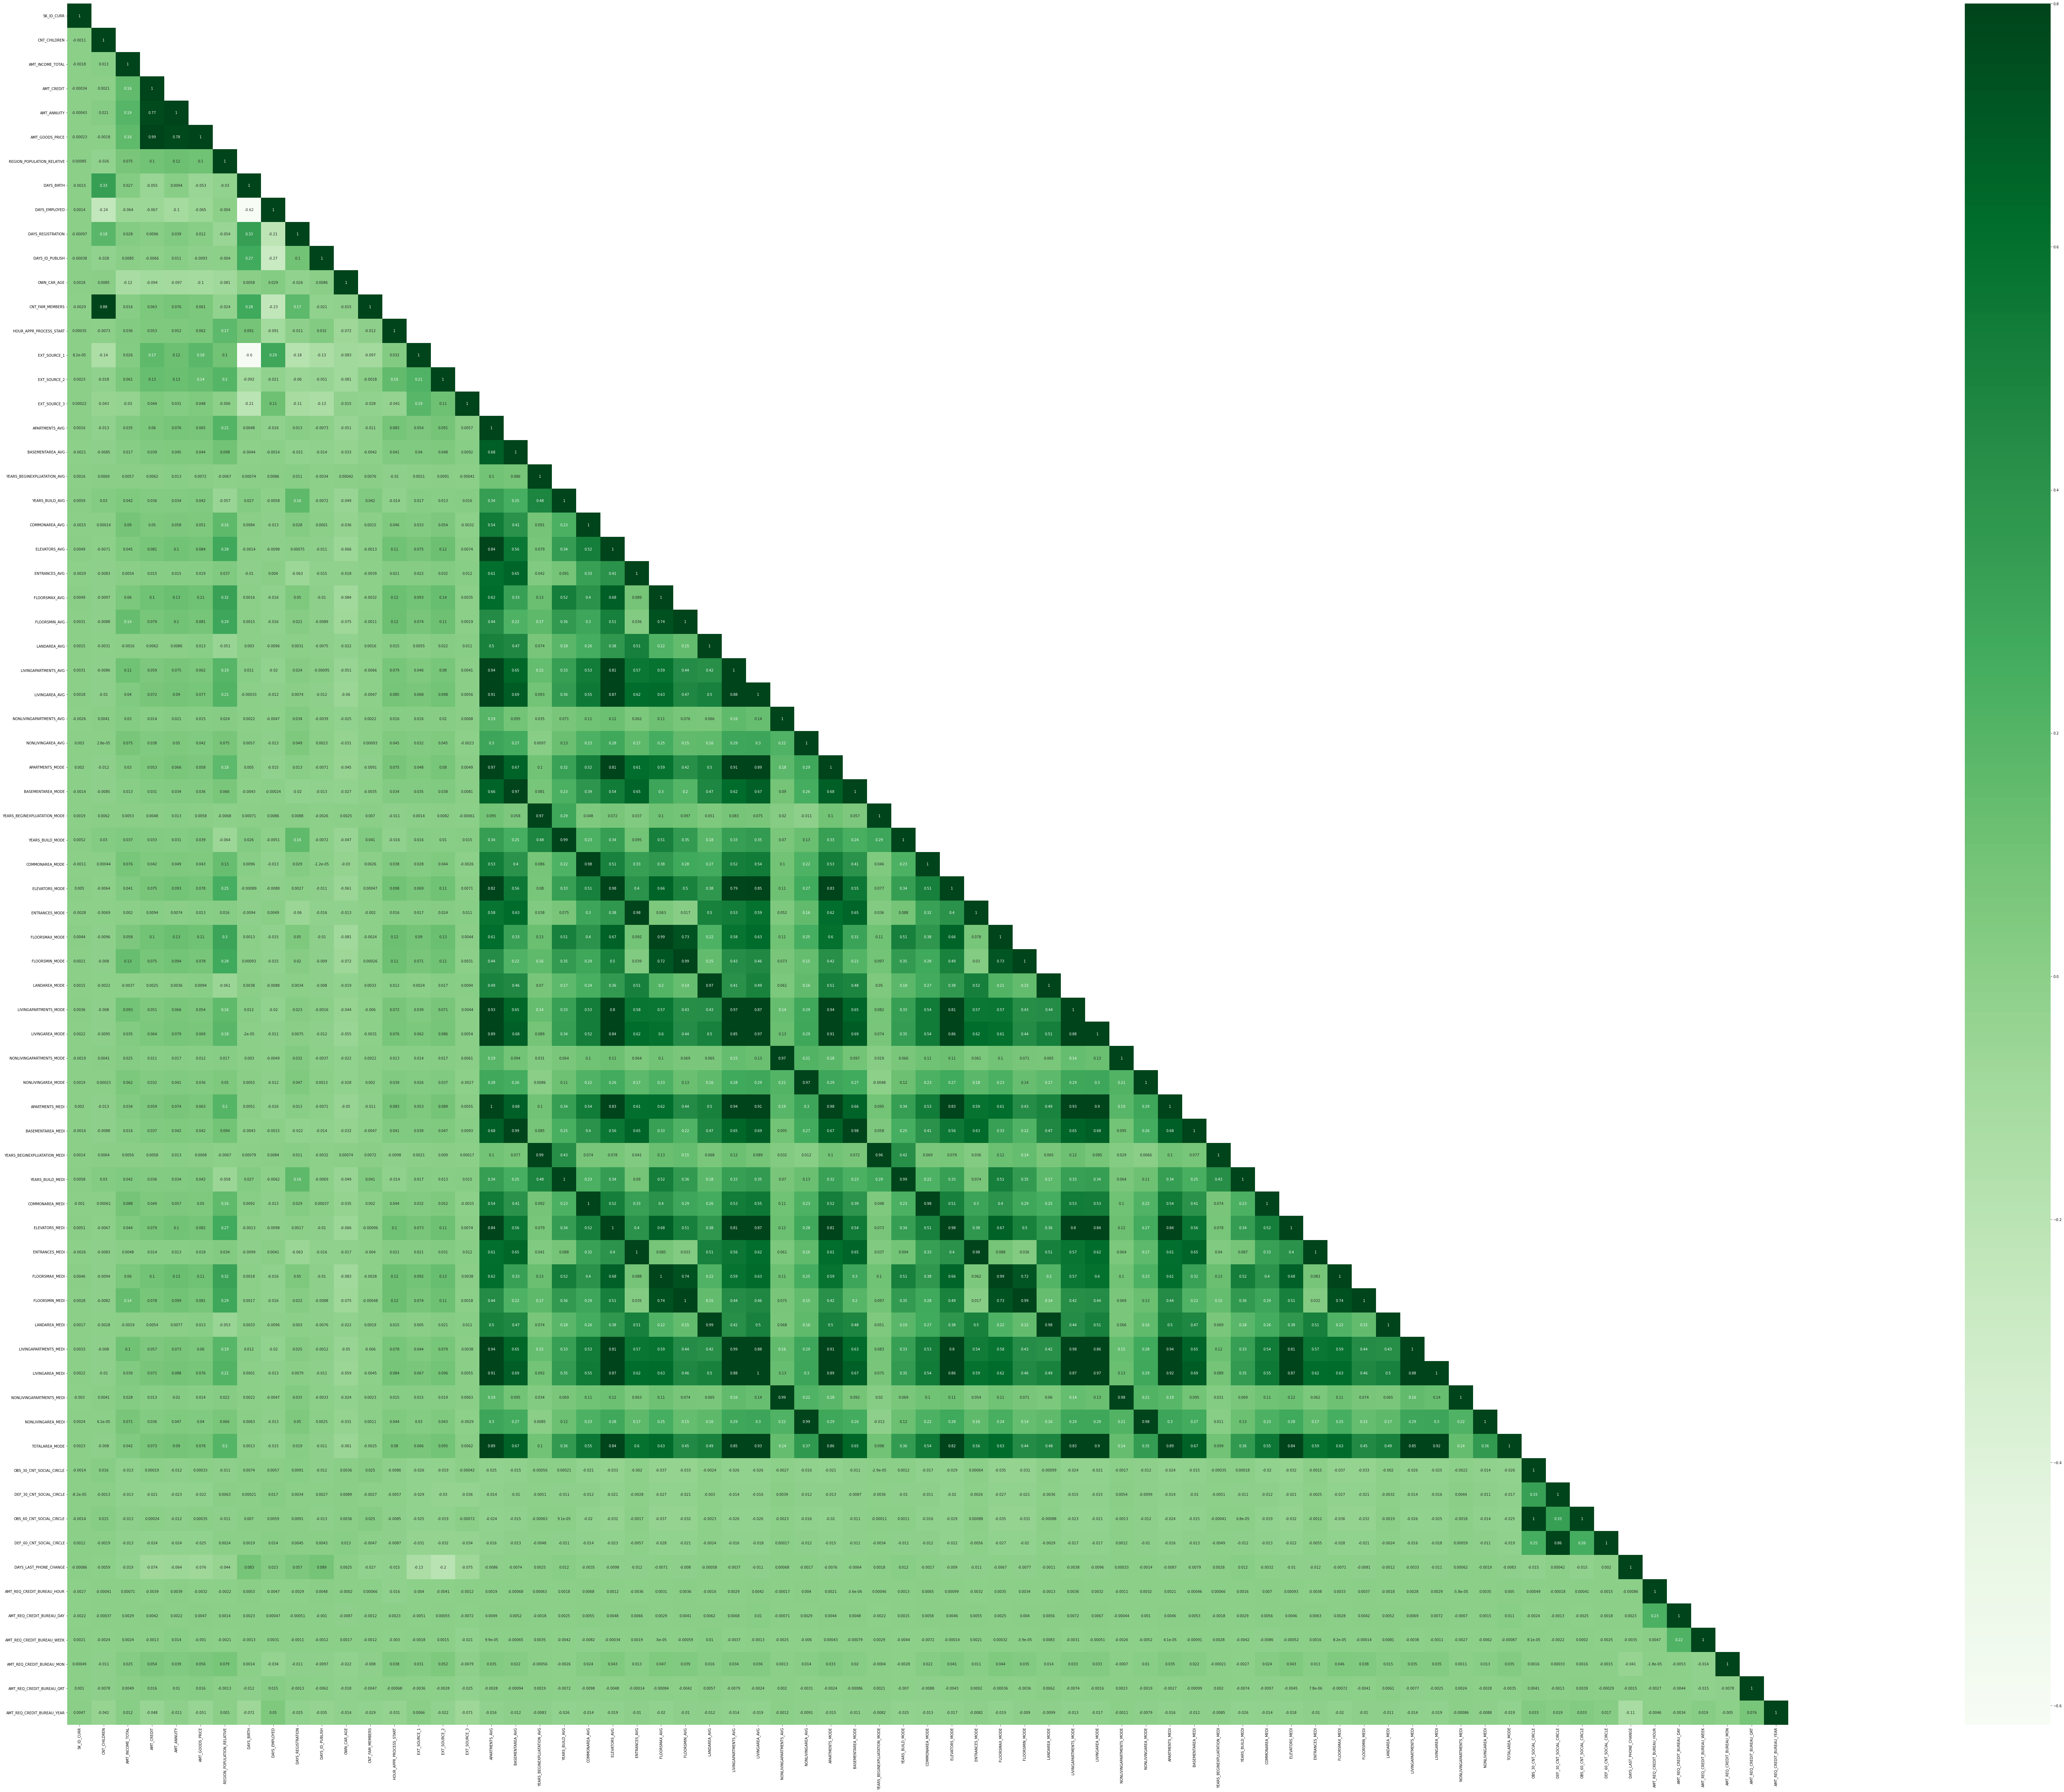

In [43]:
corrMatrix = application_train.corr()
mask = np.array(corrMatrix)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(180,90)
sns.heatmap(corrMatrix, cmap="Greens", mask=mask,vmax=.8, square=True,annot=True)

# Data preparation

In [44]:
delete_cols =  { "CNT_CHILDREN", 
                      "LIVINGAPARTMENTS_AVG",
                      "APARTMENTS_MODE",
                      "BASEMENTAREA_MODE",
                      "YEARS_BEGINEXPLUATATION_MODE",
                      "YEARS_BUILD_MODE",
                      "COMMONAREA_MODE",
                      "ELEVATORS_MODE",
                      "ENTRANCES_MODE",
                      "FLOORSMAX_MODE",
                      "FLOORSMIN_MODE",
                      "LANDAREA_MODE",
                      "LIVINGAPARTMENTS_MODE",
                      "LIVINGAREA_MODE",
                      "NONLIVINGAPARTMENTS_MODE",
                      "NONLIVINGAREA_MODE",
                      "APARTMENTS_MEDI",
                      "BASEMENTAREA_MEDI",
                      "YEARS_BEGINEXPLUATATION_MEDI",
                      "YEARS_BUILD_MEDI",
                      "COMMONAREA_MEDI",
                      "ELEVATORS_MEDI",
                      "ENTRANCES_MEDI",
                      "FLOORSMAX_MEDI",
                      "FLOORSMIN_MEDI",
                      "LANDAREA_MEDI",
                      "LIVINGAPARTMENTS_MEDI",
                      "LIVINGAREA_MEDI",
                      "NONLIVINGAPARTMENTS_MEDI",
                      "NONLIVINGAREA_MEDI",
                      "TOTALAREA_MODE",
                      "AMT_GOODS_PRICE",
                      "AMT_ANNUITY",
                      "ELEVATORS_AVG",
                      "APARTMENTS_AVG",
                      "BASEMENTAREA_AVG",
                      "OBS_30_CNT_SOCIAL_CIRCLE",
                      "DEF_30_CNT_SOCIAL_CIRCLE",
                      "LIVINGAREA_AVG"
                     }
for d in delete_cols:
    application_train.drop(d, inplace=True, axis=1)
    application_test.drop(d, inplace=True, axis=1)

num_features = application_train.select_dtypes(include = ['float64', 'int64']).columns

<AxesSubplot:>

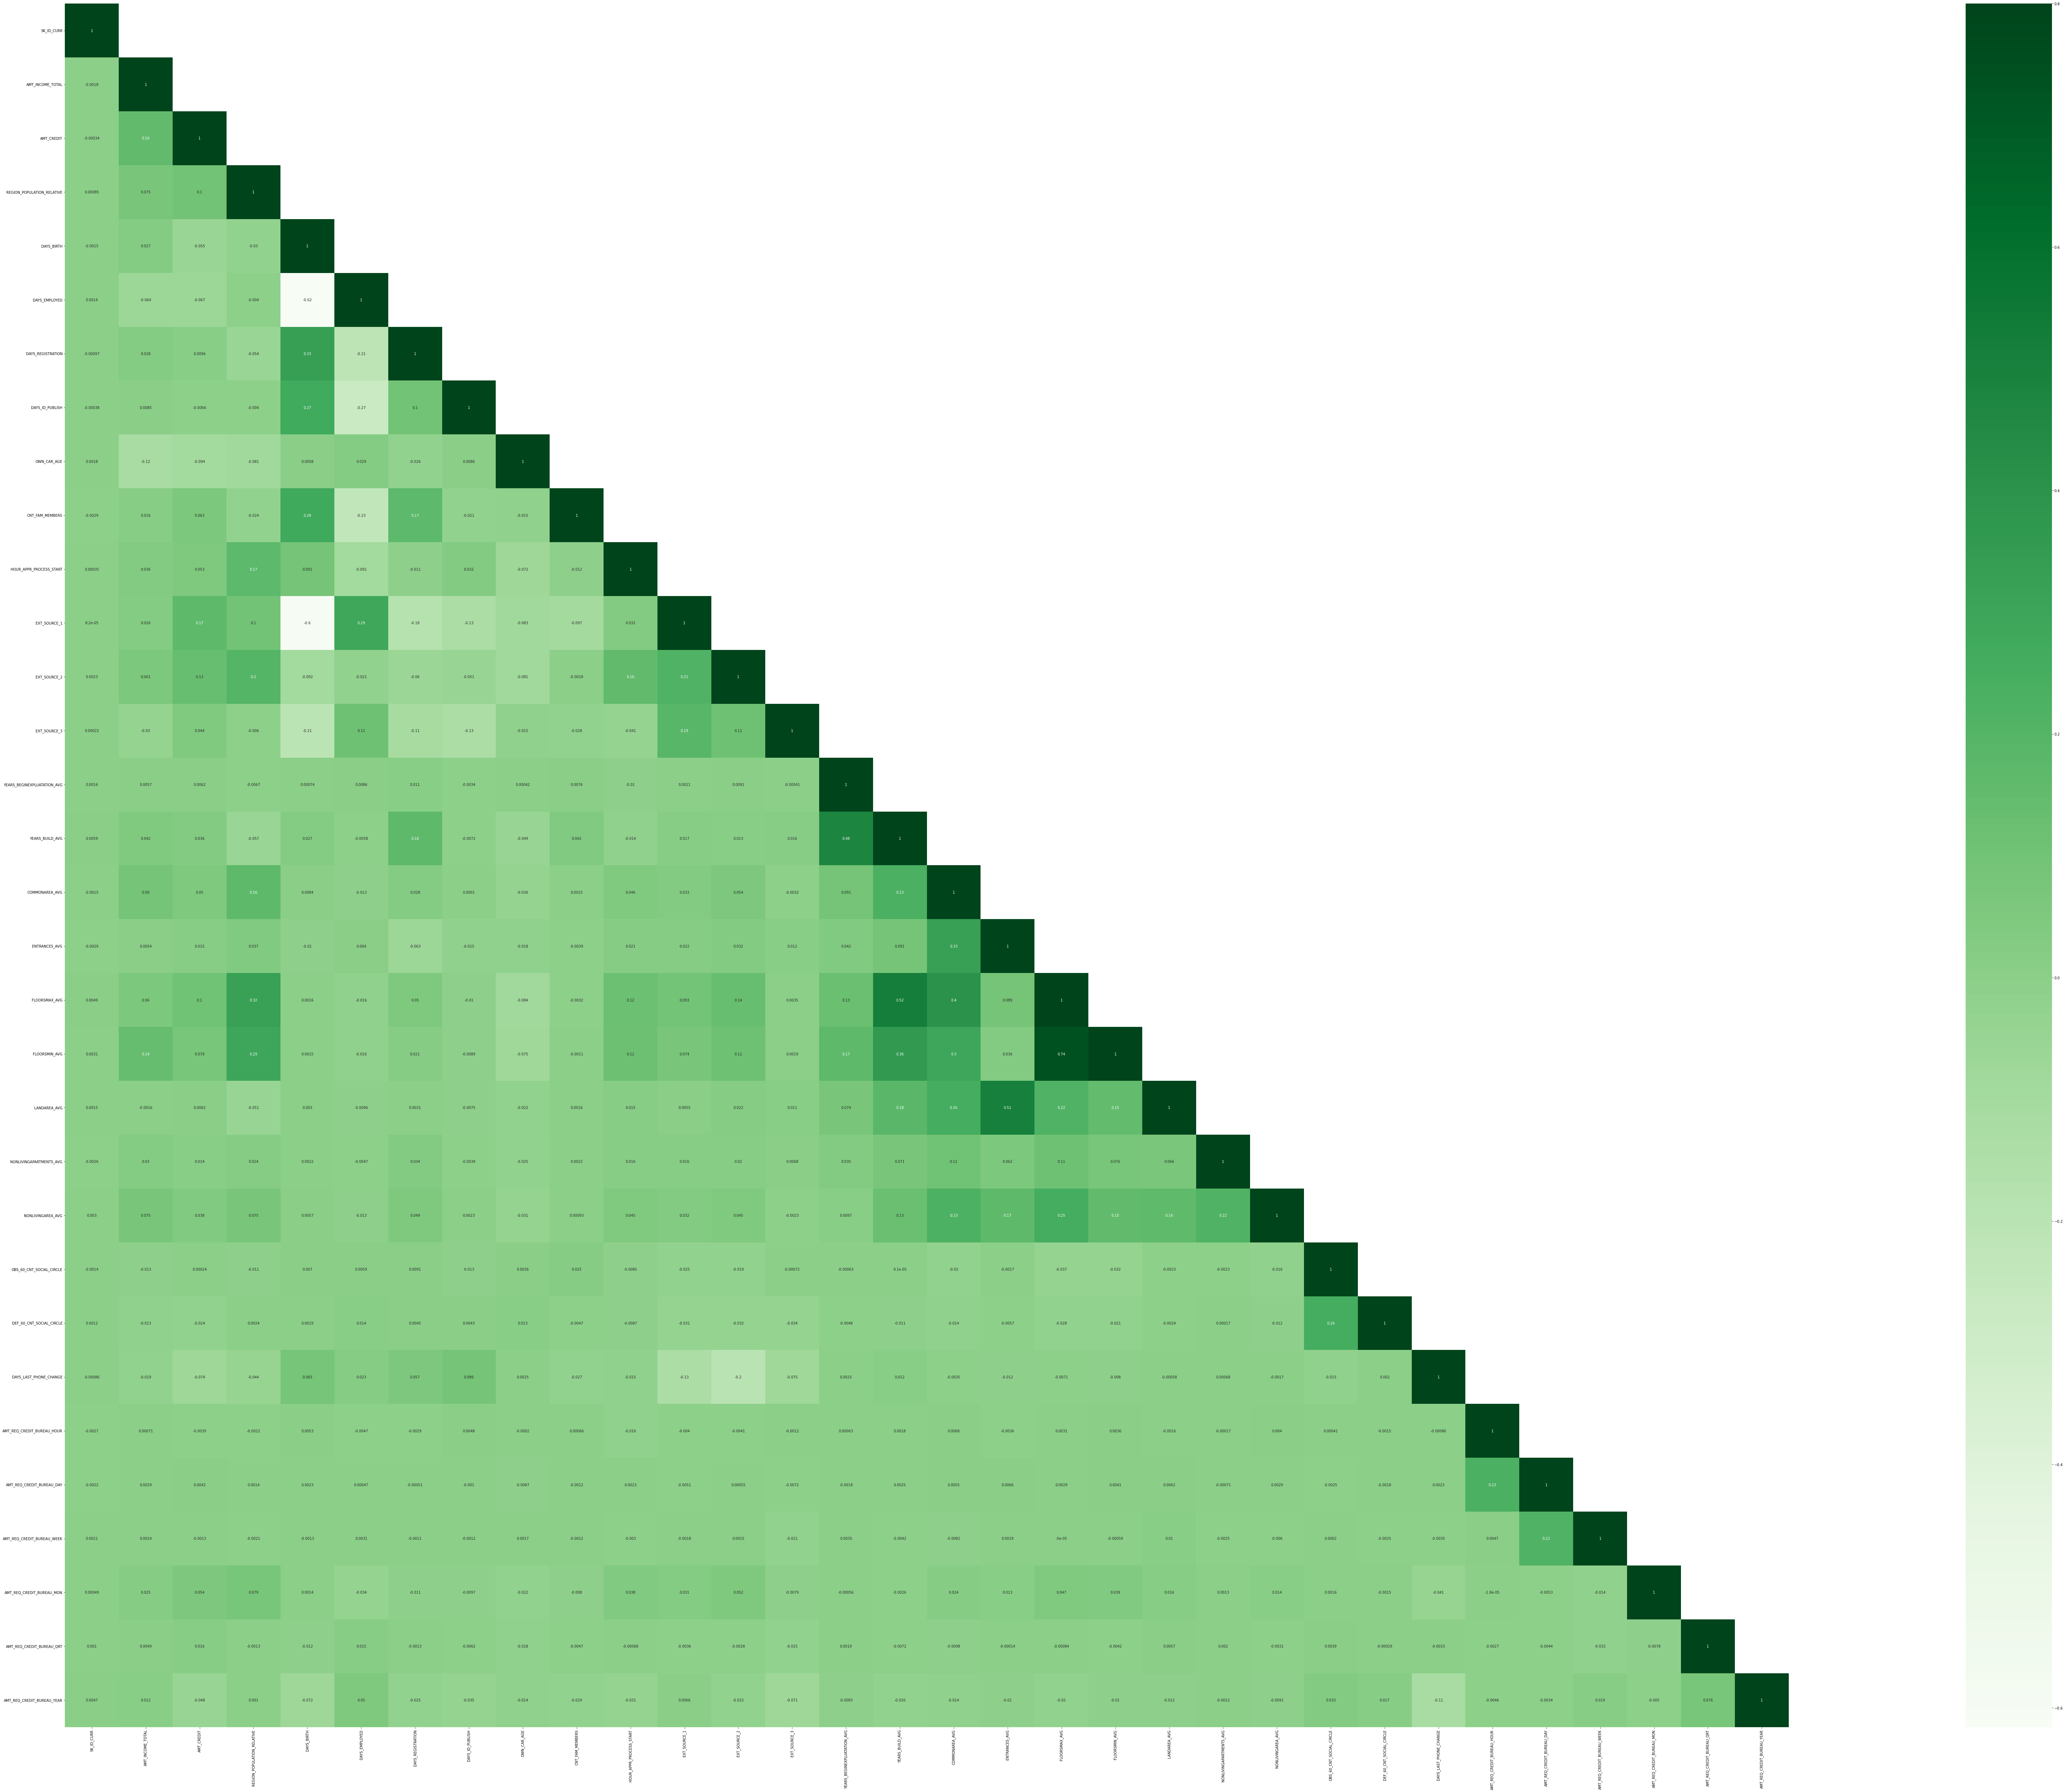

In [45]:
corrMatrix = application_train.corr()
mask = np.array(corrMatrix)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(180,90)
sns.heatmap(corrMatrix, cmap="Greens", mask=mask,vmax=.8, square=True,annot=True)

In [46]:
application_train.drop("FLOORSMIN_AVG", inplace=True, axis=1)
application_test.drop("FLOORSMIN_AVG", inplace=True, axis=1)
num_features = application_train.select_dtypes(include = ['float64', 'int64']).columns

<AxesSubplot:>

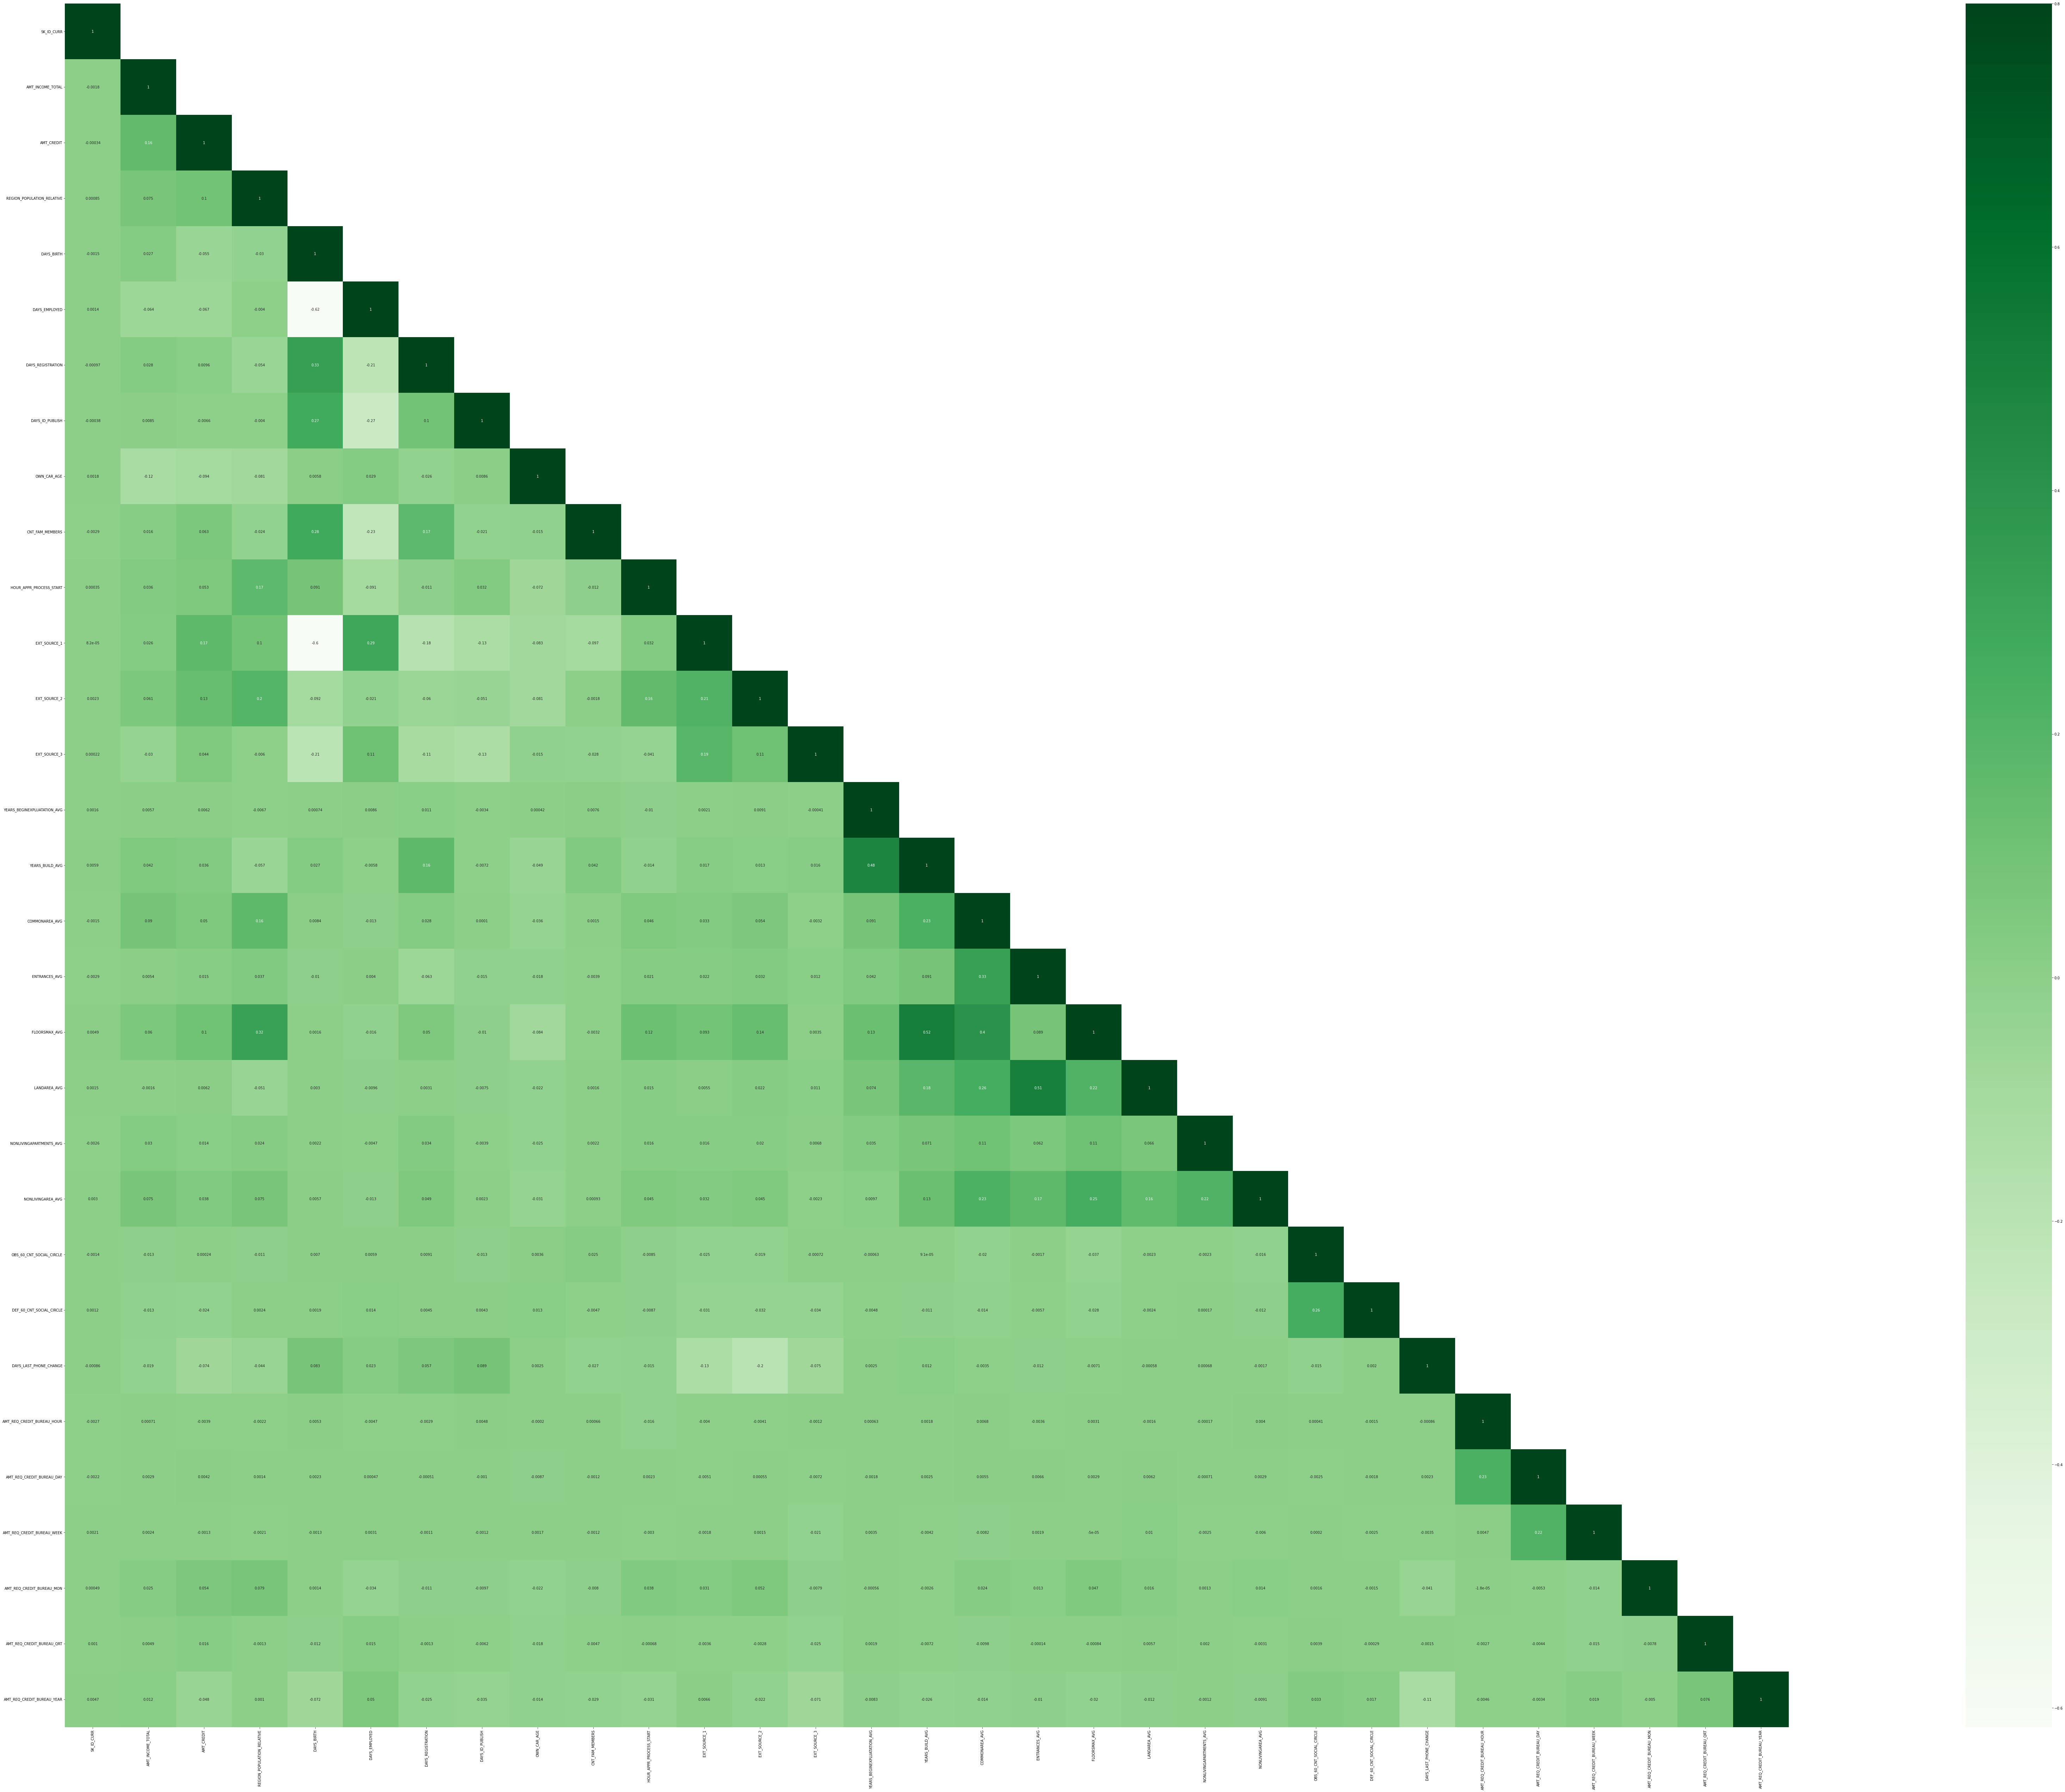

In [47]:
corrMatrix = application_train.corr()
mask = np.array(corrMatrix)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(180,90)
sns.heatmap(corrMatrix, cmap="Greens", mask=mask,vmax=.8, square=True,annot=True)

# Handling missing values

In [48]:
col_del_candidate = { 'CNT_FAM_MEMBERS',  
                      'DAYS_LAST_PHONE_CHANGE'
                    }

application_train = application_train.dropna(subset=col_del_candidate)
application_train.fillna((application_train.median()), inplace=True)

application_test = application_test.dropna(subset=col_del_candidate)
application_test.fillna((application_test.median()), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_14320\1880831182.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  application_train.fillna((application_train.median()), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_14320\1880831182.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  application_test.fillna((application_test.median()), inplace=True)


In [49]:
print(application_train[cat_features].isnull().sum()) 

FLAG_DOCUMENT_12                   0
NAME_EDUCATION_TYPE                0
REG_CITY_NOT_LIVE_CITY             0
REGION_RATING_CLIENT               0
FLAG_PHONE                         0
FLAG_DOCUMENT_4                    0
FLAG_DOCUMENT_21                   0
OCCUPATION_TYPE                96390
NAME_INCOME_TYPE                   0
FLAG_DOCUMENT_6                    0
FLAG_EMAIL                         0
NAME_TYPE_SUITE                 1290
FLAG_CONT_MOBILE                   0
FLAG_OWN_CAR                       0
FLAG_DOCUMENT_7                    0
WEEKDAY_APPR_PROCESS_START         0
FLAG_DOCUMENT_14                   0
FLAG_DOCUMENT_18                   0
LIVE_REGION_NOT_WORK_REGION        0
ORGANIZATION_TYPE                  0
REGION_RATING_CLIENT_W_CITY        0
FLAG_WORK_PHONE                    0
REG_CITY_NOT_WORK_CITY             0
FLAG_DOCUMENT_10                   0
FLAG_DOCUMENT_11                   0
FLAG_DOCUMENT_9                    0
REG_REGION_NOT_WORK_REGION         0
F

C:\Users\HP\AppData\Local\Temp\ipykernel_14320\715700842.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  print(application_train[cat_features].isnull().sum())


In [50]:
print(application_test[cat_features].isnull().sum()) 

FLAG_DOCUMENT_12                   0
NAME_EDUCATION_TYPE                0
REG_CITY_NOT_LIVE_CITY             0
REGION_RATING_CLIENT               0
FLAG_PHONE                         0
FLAG_DOCUMENT_4                    0
FLAG_DOCUMENT_21                   0
OCCUPATION_TYPE                15605
NAME_INCOME_TYPE                   0
FLAG_DOCUMENT_6                    0
FLAG_EMAIL                         0
NAME_TYPE_SUITE                  911
FLAG_CONT_MOBILE                   0
FLAG_OWN_CAR                       0
FLAG_DOCUMENT_7                    0
WEEKDAY_APPR_PROCESS_START         0
FLAG_DOCUMENT_14                   0
FLAG_DOCUMENT_18                   0
LIVE_REGION_NOT_WORK_REGION        0
ORGANIZATION_TYPE                  0
REGION_RATING_CLIENT_W_CITY        0
FLAG_WORK_PHONE                    0
REG_CITY_NOT_WORK_CITY             0
FLAG_DOCUMENT_10                   0
FLAG_DOCUMENT_11                   0
FLAG_DOCUMENT_9                    0
REG_REGION_NOT_WORK_REGION         0
F

C:\Users\HP\AppData\Local\Temp\ipykernel_14320\2798033291.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  print(application_test[cat_features].isnull().sum())


In [51]:
application_train[cat_features].describe()

C:\Users\HP\AppData\Local\Temp\ipykernel_14320\1345862137.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  application_train[cat_features].describe()


FLAG_DOCUMENT_12            NAME_EDUCATION_TYPE  \
count             307508                         307508   
unique                 2                              5   
top                    0  Secondary / secondary special   
freq              307506                         218391   

        REG_CITY_NOT_LIVE_CITY  REGION_RATING_CLIENT  FLAG_PHONE  \
count                   307508                307508      307508   
unique                       2                     3           2   
top                          0                     2           0   
freq                    283469                226981      221078   

        FLAG_DOCUMENT_4  FLAG_DOCUMENT_21 OCCUPATION_TYPE NAME_INCOME_TYPE  \
count            307508            307508          211118           307508   
unique                2                 2              18                8   
top                   0                 0        Laborers          Working   
freq             307483            307405           55186           158773   

        FLAG_DOCUMENT_6  ...  FLAG_MOBIL LIVE_CITY_NOT_WORK_CITY  \
count            307508  ...      307508                  307508   
unique                2  ...           1                       2   
top                   0  ...           1                       0   
freq             280430  ...      307508                  252294   

        FLAG_DOCUMENT_13 FLAG_DOCUMENT_20  FLAG_DOCUMENT_5 FLAG_DOCUMENT_19  \
count             307508           307508           307508           307508   
unique                 2                2                2                2   
top                    0                0                0                0   
freq              306424           307352           302861           307325   

        CODE_GENDER  FLAG_DOCUMENT_3  FLAG_DOCUMENT_8 NAME_CONTRACT_TYPE  
count        307508           307508           307508             307508  
unique            3                2                2                  2  
top               F                1                0         Cash loans  
freq         202447           218340           282485             278231  

[4 rows x 46 columns]

In [52]:
application_test[cat_features].describe()

C:\Users\HP\AppData\Local\Temp\ipykernel_14320\3572096425.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  application_test[cat_features].describe()


FLAG_DOCUMENT_12            NAME_EDUCATION_TYPE  \
count              48744                          48744   
unique                 1                              5   
top                    0  Secondary / secondary special   
freq               48744                          33988   

        REG_CITY_NOT_LIVE_CITY  REGION_RATING_CLIENT  FLAG_PHONE  \
count                    48744                 48744       48744   
unique                       2                     3           2   
top                          0                     2           0   
freq                     44968                 35356       35918   

        FLAG_DOCUMENT_4  FLAG_DOCUMENT_21 OCCUPATION_TYPE NAME_INCOME_TYPE  \
count             48744             48744           33139            48744   
unique                2                 1              18                7   
top                   0                 0        Laborers          Working   
freq              48739             48744            8655            24533   

        FLAG_DOCUMENT_6  ...  FLAG_MOBIL LIVE_CITY_NOT_WORK_CITY  \
count             48744  ...       48744                   48744   
unique                2  ...           2                       2   
top                   0  ...           1                       0   
freq              44480  ...       48743                   40252   

        FLAG_DOCUMENT_13 FLAG_DOCUMENT_20  FLAG_DOCUMENT_5 FLAG_DOCUMENT_19  \
count              48744            48744            48744            48744   
unique                 1                1                2                1   
top                    0                0                0                0   
freq               48744            48744            48025            48744   

        CODE_GENDER  FLAG_DOCUMENT_3  FLAG_DOCUMENT_8 NAME_CONTRACT_TYPE  
count         48744            48744            48744              48744  
unique            2                2                2                  2  
top               F                1                0         Cash loans  
freq          32678            38343            44432              48305  

[4 rows x 46 columns]

# Adding new types for categorical columns

In [53]:
cat_to_add = { 'OCCUPATION_TYPE', 'NAME_TYPE_SUITE' }
for c in cat_to_add:
    application_train[c] = application_train[c].cat.add_categories('Unkown')
    application_train[c].fillna("Unkown")
    application_test[c] = application_test[c].cat.add_categories('Unkown')
    application_test[c].fillna("Unkown")

# Removing several categorical features

In [54]:
cat_del_candidate = { "FLAG_MOBIL", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_7", 
                               "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_9","FLAG_DOCUMENT_12", 
                               "FLAG_CONT_MOBILE", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_17", 
                               "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_20",
                              "FLAG_DOCUMENT_21", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_15", 
                              "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_4",
                              "FLAG_DOCUMENT_6", "REG_REGION_NOT_LIVE_REGION", "FLAG_DOCUMENT_18",
                              "OCCUPATION_TYPE", "ORGANIZATION_TYPE", 
                              "WEEKDAY_APPR_PROCESS_START", "CODE_GENDER",
                              'NAME_TYPE_SUITE', 
                              'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'REG_REGION_NOT_WORK_REGION', 
                               'REGION_RATING_CLIENT_W_CITY', 'CODE_GENDER', 'NAME_FAMILY_STATUS', 
                               'WEEKDAY_APPR_PROCESS_START', 'NAME_INCOME_TYPE' } 
for d in cat_del_candidate:
    application_train.drop(d, inplace=True, axis=1)
    application_test.drop(d, inplace=True, axis=1)

cat_features = cat_features - cat_del_candidate
application_train[cat_features].describe()

C:\Users\HP\AppData\Local\Temp\ipykernel_14320\148183311.py:19: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  application_train[cat_features].describe()


NAME_EDUCATION_TYPE FLAG_OWN_CAR  LIVE_CITY_NOT_WORK_CITY  \
count                          307508       307508                   307508   
unique                              5            2                        2   
top     Secondary / secondary special            N                        0   
freq                           218391       202922                   252294   

        REG_CITY_NOT_LIVE_CITY  FLAG_PHONE  REGION_RATING_CLIENT  \
count                   307508      307508                307508   
unique                       2           2                     3   
top                          0           0                     2   
freq                    283469      221078                226981   

       FLAG_OWN_REALTY  FLAG_EMP_PHONE  FLAG_DOCUMENT_8  \
count           307508          307508           307508   
unique               2               2                2   
top                  Y               1                0   
freq            213309          252122           282485   

        LIVE_REGION_NOT_WORK_REGION  FLAG_WORK_PHONE  FLAG_DOCUMENT_3  \
count                        307508           307508           307508   
unique                            2                2                2   
top                               0                0                1   
freq                         295006           246201           218340   

        FLAG_EMAIL  REG_CITY_NOT_WORK_CITY NAME_CONTRACT_TYPE  
count       307508                  307508             307508  
unique           2                       2                  2  
top              0                       0         Cash loans  
freq        290066                  236642             278231

In [55]:
application_test[cat_features].describe()

C:\Users\HP\AppData\Local\Temp\ipykernel_14320\3572096425.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  application_test[cat_features].describe()


NAME_EDUCATION_TYPE FLAG_OWN_CAR  LIVE_CITY_NOT_WORK_CITY  \
count                           48744        48744                    48744   
unique                              5            2                        2   
top     Secondary / secondary special            N                        0   
freq                            33988        32311                    40252   

        REG_CITY_NOT_LIVE_CITY  FLAG_PHONE  REGION_RATING_CLIENT  \
count                    48744       48744                 48744   
unique                       2           2                     3   
top                          0           0                     2   
freq                     44968       35918                 35356   

       FLAG_OWN_REALTY  FLAG_EMP_PHONE  FLAG_DOCUMENT_8  \
count            48744           48744            48744   
unique               2               2                2   
top                  Y               1                0   
freq             33658           39469            44432   

        LIVE_REGION_NOT_WORK_REGION  FLAG_WORK_PHONE  FLAG_DOCUMENT_3  \
count                         48744            48744            48744   
unique                            2                2                2   
top                               0                0                1   
freq                          46695            38766            38343   

        FLAG_EMAIL  REG_CITY_NOT_WORK_CITY NAME_CONTRACT_TYPE  
count        48744                   48744              48744  
unique           2                       2                  2  
top              0                       0         Cash loans  
freq         40816                   37793              48305

# One-Hot coding

In [56]:
one_hot_enc = { "NAME_CONTRACT_TYPE", "FLAG_EMP_PHONE", 'REG_CITY_NOT_LIVE_CITY', 'FLAG_OWN_CAR', 
                          'FLAG_WORK_PHONE', 'FLAG_EMAIL', 'LIVE_REGION_NOT_WORK_REGION', 
                          'LIVE_CITY_NOT_WORK_CITY', 'FLAG_OWN_REALTY', 'FLAG_DOCUMENT_3', 'FLAG_PHONE', 
                          'FLAG_DOCUMENT_8', 'REG_CITY_NOT_WORK_CITY', 'REGION_RATING_CLIENT'
                         }

application_train = pd.get_dummies(application_train, columns=one_hot_enc, prefix = one_hot_enc)
application_test = pd.get_dummies(application_test, columns=one_hot_enc, prefix = one_hot_enc)

C:\Users\HP\AppData\Local\Temp\ipykernel_14320\3977969625.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  application_train = pd.get_dummies(application_train, columns=one_hot_enc, prefix = one_hot_enc)
C:\Users\HP\AppData\Local\Temp\ipykernel_14320\3977969625.py:8: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  application_test = pd.get_dummies(application_test, columns=one_hot_enc, prefix = one_hot_enc)


# Label encoding

In [57]:
application_train['NAME_EDUCATION_TYPE'] = application_train['NAME_EDUCATION_TYPE'].cat.codes
application_test['NAME_EDUCATION_TYPE'] = application_test['NAME_EDUCATION_TYPE'].cat.codes

In [58]:
application_train.describe()

SK_ID_CURR  AMT_INCOME_TOTAL    AMT_CREDIT  NAME_EDUCATION_TYPE  \
count  307508.000000      3.075080e+05  3.075080e+05        307508.000000   
mean   278181.332947      1.687970e+05  5.990268e+05             3.188285   
std    102789.982905      2.371237e+05  4.024923e+05             1.298752   
min    100002.000000      2.565000e+04  4.500000e+04             0.000000   
25%    189146.750000      1.125000e+05  2.700000e+05             2.000000   
50%    278202.500000      1.471500e+05  5.135310e+05             4.000000   
75%    367143.250000      2.025000e+05  8.086500e+05             4.000000   
max    456255.000000      1.170000e+08  4.050000e+06             4.000000   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307508.000000  307508.000000  307508.000000   
mean                     0.020868  -16037.041560   63815.673956   
std                      0.013831    4363.980429  141276.312547   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1214.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE  ...  \
count      307508.000000    307508.000000  307508.000000  ...   
mean        -4986.137584     -2994.208382      10.041023  ...   
std          3522.896819      1509.449226       7.115235  ...   
min        -24672.000000     -7197.000000       0.000000  ...   
25%         -7480.000000     -4299.000000       9.000000  ...   
50%         -4504.000000     -3254.000000       9.000000  ...   
75%         -2010.000000     -1720.000000       9.000000  ...   
max             0.000000         0.000000      91.000000  ...   

       FLAG_WORK_PHONE_0  FLAG_WORK_PHONE_1  FLAG_DOCUMENT_3_0  \
count      307508.000000      307508.000000      307508.000000   
mean            0.800633           0.199367           0.289970   
std             0.399525           0.399525           0.453749   
min             0.000000           0.000000           0.000000   
25%             1.000000           0.000000           0.000000   
50%             1.000000           0.000000           0.000000   
75%             1.000000           0.000000           1.000000   
max             1.000000           1.000000           1.000000   

       FLAG_DOCUMENT_3_1   FLAG_EMAIL_0   FLAG_EMAIL_1  \
count      307508.000000  307508.000000  307508.000000   
mean            0.710030       0.943280       0.056720   
std             0.453749       0.231308       0.231308   
min             0.000000       0.000000       0.000000   
25%             0.000000       1.000000       0.000000   
50%             1.000000       1.000000       0.000000   
75%             1.000000       1.000000       0.000000   
max             1.000000       1.000000       1.000000   

       REG_CITY_NOT_WORK_CITY_0  REG_CITY_NOT_WORK_CITY_1  \
count             307508.000000             307508.000000   
mean                   0.769547                  0.230453   
std                    0.421123                  0.421123   
min                    0.000000                  0.000000   
25%                    1.000000                  0.000000   
50%                    1.000000                  0.000000   
75%                    1.000000                  0.000000   
max                    1.000000                  1.000000   

       NAME_CONTRACT_TYPE_Cash loans  NAME_CONTRACT_TYPE_Revolving loans  
count                  307508.000000                       307508.000000  
mean                        0.904793                            0.095207  
std                         0.293502                            0.293502  
min                         0.000000                            0.000000  
25%                         1.000000                            0.000000  
50%     

In [59]:
application_test.describe()

SK_ID_CURR  AMT_INCOME_TOTAL    AMT_CREDIT  NAME_EDUCATION_TYPE  \
count   48744.000000      4.874400e+04  4.874400e+04         48744.000000   
mean   277796.676350      1.784318e+05  5.167404e+05             3.145844   
std    103169.547296      1.015226e+05  3.653970e+05             1.321386   
min    100001.000000      2.694150e+04  4.500000e+04             0.000000   
25%    188557.750000      1.125000e+05  2.606400e+05             1.000000   
50%    277549.000000      1.575000e+05  4.500000e+05             4.000000   
75%    367555.500000      2.250000e+05  6.750000e+05             4.000000   
max    456250.000000      4.410000e+06  2.245500e+06             4.000000   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  \
count                48744.000000  48744.000000   48744.000000   
mean                     0.021226 -16068.084605   67485.366322   
std                      0.014428   4325.900393  144348.507136   
min                      0.000253 -25195.000000  -17463.000000   
25%                      0.010006 -19637.000000   -2910.000000   
50%                      0.018850 -15785.000000   -1293.000000   
75%                      0.028663 -12496.000000    -296.000000   
max                      0.072508  -7338.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH   OWN_CAR_AGE  ...  \
count       48744.000000     48744.000000  48744.000000  ...   
mean        -4967.652716     -3051.712949      9.939193  ...   
std          3552.612035      1569.276709      6.784398  ...   
min        -23722.000000     -6348.000000      0.000000  ...   
25%         -7459.250000     -4448.000000      9.000000  ...   
50%         -4490.000000     -3234.000000      9.000000  ...   
75%         -1901.000000     -1706.000000      9.000000  ...   
max             0.000000         0.000000     74.000000  ...   

       FLAG_WORK_PHONE_0  FLAG_WORK_PHONE_1  FLAG_DOCUMENT_3_0  \
count       48744.000000       48744.000000       48744.000000   
mean            0.795298           0.204702           0.213380   
std             0.403488           0.403488           0.409698   
min             0.000000           0.000000           0.000000   
25%             1.000000           0.000000           0.000000   
50%             1.000000           0.000000           0.000000   
75%             1.000000           0.000000           0.000000   
max             1.000000           1.000000           1.000000   

       FLAG_DOCUMENT_3_1  FLAG_EMAIL_0  FLAG_EMAIL_1  \
count       48744.000000  48744.000000  48744.000000   
mean            0.786620      0.837354      0.162646   
std             0.409698      0.369046      0.369046   
min             0.000000      0.000000      0.000000   
25%             1.000000      1.000000      0.000000   
50%             1.000000      1.000000      0.000000   
75%             1.000000      1.000000      0.000000   
max             1.000000      1.000000      1.000000   

       REG_CITY_NOT_WORK_CITY_0  REG_CITY_NOT_WORK_CITY_1  \
count              48744.000000              48744.000000   
mean                   0.775336                  0.224664   
std                    0.417365                  0.417365   
min                    0.000000                  0.000000   
25%                    1.000000                  0.000000   
50%                    1.000000                  0.000000   
75%                    1.000000                  0.000000   
max                    1.000000                  1.000000   

       NAME_CONTRACT_TYPE_Cash loans  NAME_CONTRACT_TYPE_Revolving loans  
count                   48744.000000                        48744.000000  
mean                        0.990994                            0.009006  
std                         0.094474                            0.094474  
min                         0.000000                            0.000000  
25%                         1.000000                            0.000000  
50%                         1.000000        

# New distribution

In [60]:
num_features = application_train.select_dtypes(include = ['float64', 'int64']).columns
num_features_application_test = application_test.select_dtypes(include = ['float64', 'int64']).columns

array([[<AxesSubplot:title={'center':'SK_ID_CURR'}>,
        <AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>,
        <AxesSubplot:title={'center':'REGION_POPULATION_RELATIVE'}>,
        <AxesSubplot:title={'center':'DAYS_BIRTH'}>,
        <AxesSubplot:title={'center':'DAYS_EMPLOYED'}>],
       [<AxesSubplot:title={'center':'DAYS_REGISTRATION'}>,
        <AxesSubplot:title={'center':'DAYS_ID_PUBLISH'}>,
        <AxesSubplot:title={'center':'OWN_CAR_AGE'}>,
        <AxesSubplot:title={'center':'CNT_FAM_MEMBERS'}>,
        <AxesSubplot:title={'center':'HOUR_APPR_PROCESS_START'}>,
        <AxesSubplot:title={'center':'EXT_SOURCE_1'}>],
       [<AxesSubplot:title={'center':'EXT_SOURCE_2'}>,
        <AxesSubplot:title={'center':'EXT_SOURCE_3'}>,
        <AxesSubplot:title={'center':'YEARS_BEGINEXPLUATATION_AVG'}>,
        <AxesSubplot:title={'center':'YEARS_BUILD_AVG'}>,
        <AxesSubplot:title={'center':'COMMONAREA_AVG'}>,
        <

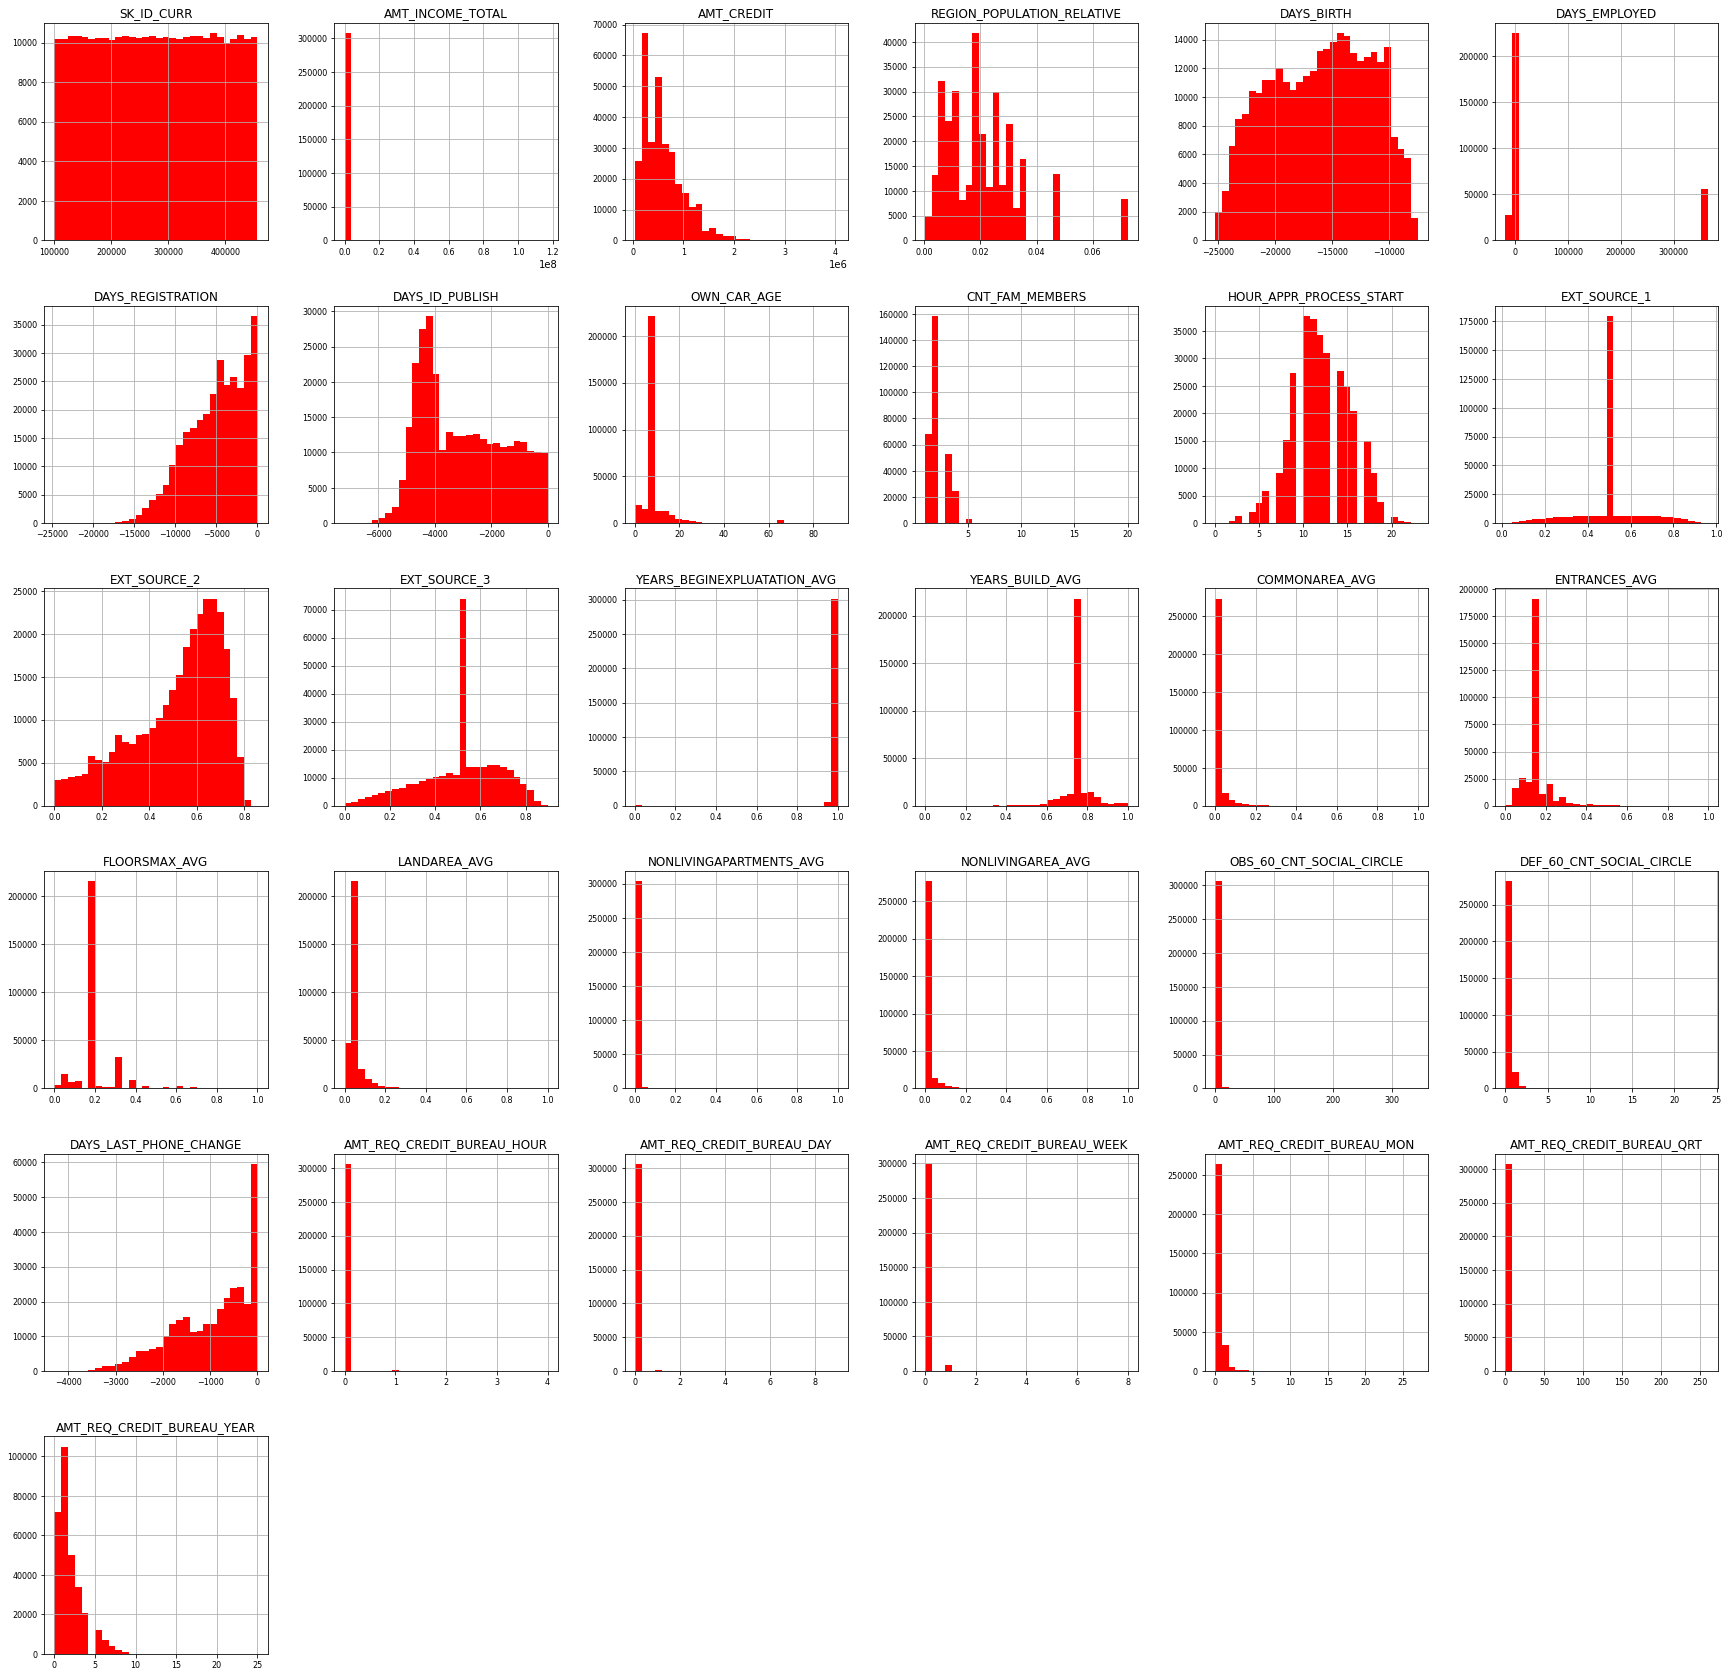

In [61]:
application_train[num_features].hist(figsize=(30, 30), color = 'r', bins=30, xlabelsize=8, ylabelsize=8)

array([[<AxesSubplot:title={'center':'SK_ID_CURR'}>,
        <AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>,
        <AxesSubplot:title={'center':'REGION_POPULATION_RELATIVE'}>,
        <AxesSubplot:title={'center':'DAYS_BIRTH'}>,
        <AxesSubplot:title={'center':'DAYS_EMPLOYED'}>],
       [<AxesSubplot:title={'center':'DAYS_REGISTRATION'}>,
        <AxesSubplot:title={'center':'DAYS_ID_PUBLISH'}>,
        <AxesSubplot:title={'center':'OWN_CAR_AGE'}>,
        <AxesSubplot:title={'center':'CNT_FAM_MEMBERS'}>,
        <AxesSubplot:title={'center':'HOUR_APPR_PROCESS_START'}>,
        <AxesSubplot:title={'center':'EXT_SOURCE_1'}>],
       [<AxesSubplot:title={'center':'EXT_SOURCE_2'}>,
        <AxesSubplot:title={'center':'EXT_SOURCE_3'}>,
        <AxesSubplot:title={'center':'YEARS_BEGINEXPLUATATION_AVG'}>,
        <AxesSubplot:title={'center':'YEARS_BUILD_AVG'}>,
        <AxesSubplot:title={'center':'COMMONAREA_AVG'}>,
        <

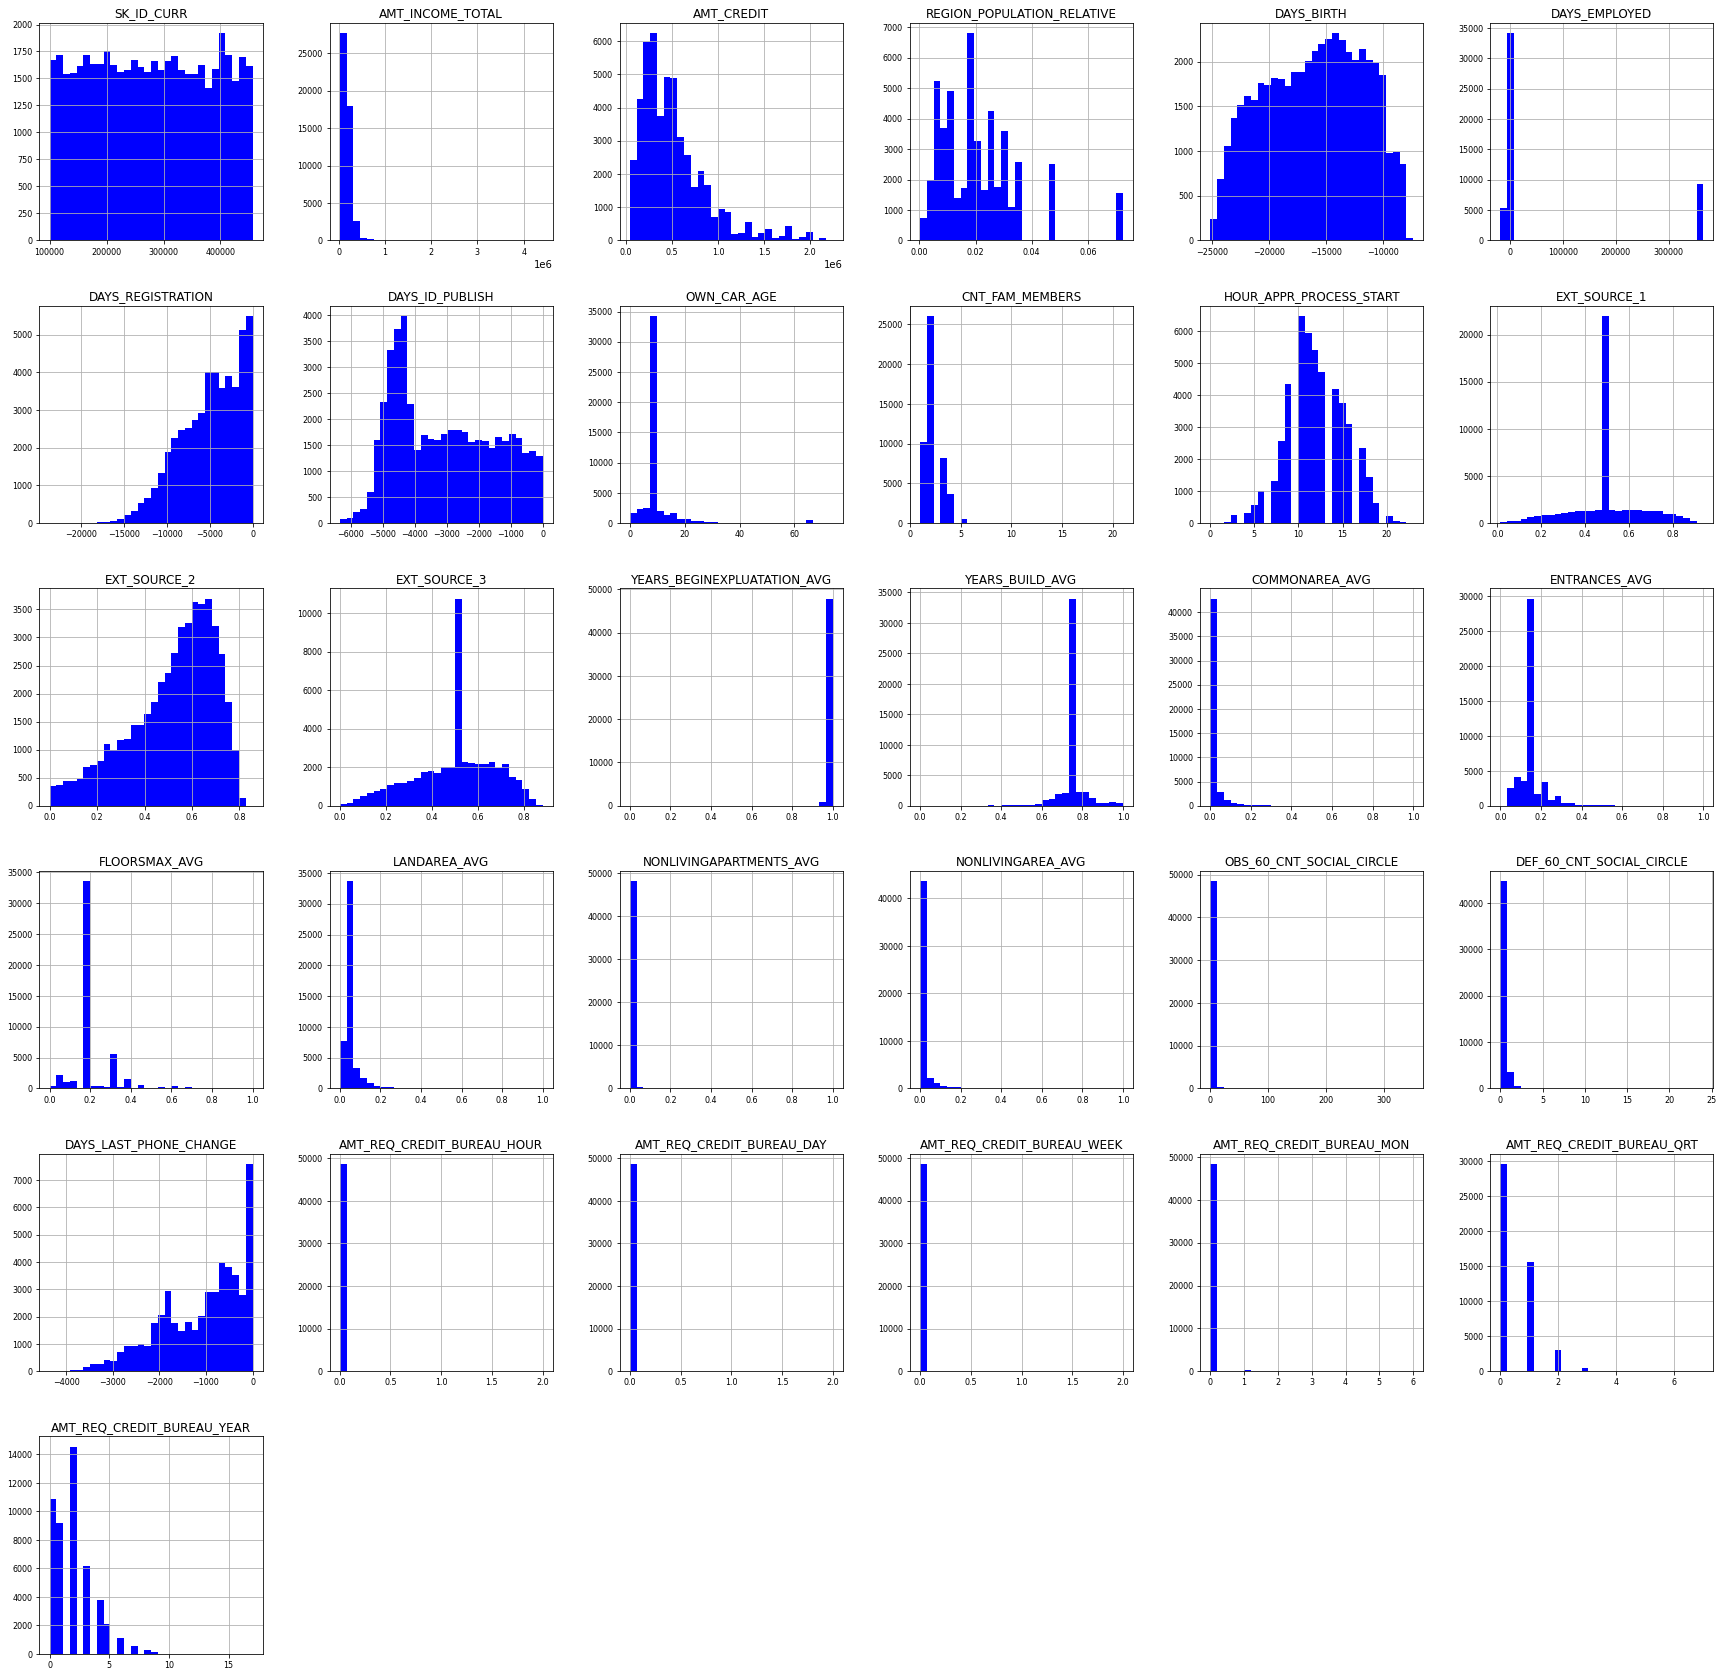

In [62]:
application_test[num_features_application_test].hist(figsize=(30, 30), color = 'b', bins=30, xlabelsize=8, ylabelsize=8)

# Remove invalid features

In [63]:
num_del_candidate = { "NONLIVINGAPARTMENTS_AVG", "NONLIVINGAREA_AVG", "OBS_60_CNT_SOCIAL_CIRCLE", 
                               "DEF_60_CNT_SOCIAL_CIRCLE", "YEARS_BEGINEXPLUATATION_AVG","AMT_REQ_CREDIT_BUREAU_HOUR", 
                               "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_QRT" } 
for d in num_del_candidate:
    application_train.drop(d, inplace=True, axis=1)
    application_test.drop(d, inplace=True, axis=1)

In [64]:
application_train.describe()

SK_ID_CURR  AMT_INCOME_TOTAL    AMT_CREDIT  NAME_EDUCATION_TYPE  \
count  307508.000000      3.075080e+05  3.075080e+05        307508.000000   
mean   278181.332947      1.687970e+05  5.990268e+05             3.188285   
std    102789.982905      2.371237e+05  4.024923e+05             1.298752   
min    100002.000000      2.565000e+04  4.500000e+04             0.000000   
25%    189146.750000      1.125000e+05  2.700000e+05             2.000000   
50%    278202.500000      1.471500e+05  5.135310e+05             4.000000   
75%    367143.250000      2.025000e+05  8.086500e+05             4.000000   
max    456255.000000      1.170000e+08  4.050000e+06             4.000000   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307508.000000  307508.000000  307508.000000   
mean                     0.020868  -16037.041560   63815.673956   
std                      0.013831    4363.980429  141276.312547   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1214.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE  ...  \
count      307508.000000    307508.000000  307508.000000  ...   
mean        -4986.137584     -2994.208382      10.041023  ...   
std          3522.896819      1509.449226       7.115235  ...   
min        -24672.000000     -7197.000000       0.000000  ...   
25%         -7480.000000     -4299.000000       9.000000  ...   
50%         -4504.000000     -3254.000000       9.000000  ...   
75%         -2010.000000     -1720.000000       9.000000  ...   
max             0.000000         0.000000      91.000000  ...   

       FLAG_WORK_PHONE_0  FLAG_WORK_PHONE_1  FLAG_DOCUMENT_3_0  \
count      307508.000000      307508.000000      307508.000000   
mean            0.800633           0.199367           0.289970   
std             0.399525           0.399525           0.453749   
min             0.000000           0.000000           0.000000   
25%             1.000000           0.000000           0.000000   
50%             1.000000           0.000000           0.000000   
75%             1.000000           0.000000           1.000000   
max             1.000000           1.000000           1.000000   

       FLAG_DOCUMENT_3_1   FLAG_EMAIL_0   FLAG_EMAIL_1  \
count      307508.000000  307508.000000  307508.000000   
mean            0.710030       0.943280       0.056720   
std             0.453749       0.231308       0.231308   
min             0.000000       0.000000       0.000000   
25%             0.000000       1.000000       0.000000   
50%             1.000000       1.000000       0.000000   
75%             1.000000       1.000000       0.000000   
max             1.000000       1.000000       1.000000   

       REG_CITY_NOT_WORK_CITY_0  REG_CITY_NOT_WORK_CITY_1  \
count             307508.000000             307508.000000   
mean                   0.769547                  0.230453   
std                    0.421123                  0.421123   
min                    0.000000                  0.000000   
25%                    1.000000                  0.000000   
50%                    1.000000                  0.000000   
75%                    1.000000                  0.000000   
max                    1.000000                  1.000000   

       NAME_CONTRACT_TYPE_Cash loans  NAME_CONTRACT_TYPE_Revolving loans  
count                  307508.000000                       307508.000000  
mean                        0.904793                            0.095207  
std                         0.293502                            0.293502  
min                         0.000000                            0.000000  
25%                         1.000000                            0.000000  
50%     

In [65]:
application_test.describe()

SK_ID_CURR  AMT_INCOME_TOTAL    AMT_CREDIT  NAME_EDUCATION_TYPE  \
count   48744.000000      4.874400e+04  4.874400e+04         48744.000000   
mean   277796.676350      1.784318e+05  5.167404e+05             3.145844   
std    103169.547296      1.015226e+05  3.653970e+05             1.321386   
min    100001.000000      2.694150e+04  4.500000e+04             0.000000   
25%    188557.750000      1.125000e+05  2.606400e+05             1.000000   
50%    277549.000000      1.575000e+05  4.500000e+05             4.000000   
75%    367555.500000      2.250000e+05  6.750000e+05             4.000000   
max    456250.000000      4.410000e+06  2.245500e+06             4.000000   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  \
count                48744.000000  48744.000000   48744.000000   
mean                     0.021226 -16068.084605   67485.366322   
std                      0.014428   4325.900393  144348.507136   
min                      0.000253 -25195.000000  -17463.000000   
25%                      0.010006 -19637.000000   -2910.000000   
50%                      0.018850 -15785.000000   -1293.000000   
75%                      0.028663 -12496.000000    -296.000000   
max                      0.072508  -7338.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH   OWN_CAR_AGE  ...  \
count       48744.000000     48744.000000  48744.000000  ...   
mean        -4967.652716     -3051.712949      9.939193  ...   
std          3552.612035      1569.276709      6.784398  ...   
min        -23722.000000     -6348.000000      0.000000  ...   
25%         -7459.250000     -4448.000000      9.000000  ...   
50%         -4490.000000     -3234.000000      9.000000  ...   
75%         -1901.000000     -1706.000000      9.000000  ...   
max             0.000000         0.000000     74.000000  ...   

       FLAG_WORK_PHONE_0  FLAG_WORK_PHONE_1  FLAG_DOCUMENT_3_0  \
count       48744.000000       48744.000000       48744.000000   
mean            0.795298           0.204702           0.213380   
std             0.403488           0.403488           0.409698   
min             0.000000           0.000000           0.000000   
25%             1.000000           0.000000           0.000000   
50%             1.000000           0.000000           0.000000   
75%             1.000000           0.000000           0.000000   
max             1.000000           1.000000           1.000000   

       FLAG_DOCUMENT_3_1  FLAG_EMAIL_0  FLAG_EMAIL_1  \
count       48744.000000  48744.000000  48744.000000   
mean            0.786620      0.837354      0.162646   
std             0.409698      0.369046      0.369046   
min             0.000000      0.000000      0.000000   
25%             1.000000      1.000000      0.000000   
50%             1.000000      1.000000      0.000000   
75%             1.000000      1.000000      0.000000   
max             1.000000      1.000000      1.000000   

       REG_CITY_NOT_WORK_CITY_0  REG_CITY_NOT_WORK_CITY_1  \
count              48744.000000              48744.000000   
mean                   0.775336                  0.224664   
std                    0.417365                  0.417365   
min                    0.000000                  0.000000   
25%                    1.000000                  0.000000   
50%                    1.000000                  0.000000   
75%                    1.000000                  0.000000   
max                    1.000000                  1.000000   

       NAME_CONTRACT_TYPE_Cash loans  NAME_CONTRACT_TYPE_Revolving loans  
count                   48744.000000                        48744.000000  
mean                        0.990994                            0.009006  
std                         0.094474                            0.094474  
min                         0.000000                            0.000000  
25%                         1.000000                            0.000000  
50%                         1.000000        

# We balance the data in the application_train dataset

In [66]:
application_train = application_train.drop(application_train[application_train.TARGET == 0].index).append(application_train.drop(application_train[application_train.TARGET == 1].index).sample(50_000))
application_train

C:\Users\HP\AppData\Local\Temp\ipykernel_14320\1655760770.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  application_train = application_train.drop(application_train[application_train.TARGET == 0].index).append(application_train.drop(application_train[application_train.TARGET == 1].index).sample(50_000))


SK_ID_CURR TARGET  AMT_INCOME_TOTAL  AMT_CREDIT  NAME_EDUCATION_TYPE  \
0           100002      1          202500.0    406597.5                    4   
26          100031      1          112500.0    979992.0                    4   
40          100047      1          202500.0   1193580.0                    4   
42          100049      1          135000.0    288873.0                    4   
81          100096      1           81000.0    252000.0                    4   
...            ...    ...               ...         ...                  ...   
134959      256535      0           45000.0    418743.0                    4   
96417       211931      0           90000.0    675000.0                    4   
36746       142560      0          180000.0   1113840.0                    4   
11040       112860      0          180000.0    900000.0                    4   
251562      391078      0          157500.0    314100.0                    1   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                         0.018801       -9461           -637   
26                        0.018029      -18724          -2628   
40                        0.025164      -17482          -1262   
42                        0.007305      -13384          -3597   
81                        0.028663      -24794         365243   
...                            ...         ...            ...   
134959                    0.035792      -10158          -1998   
96417                     0.035792      -20830         -13488   
36746                     0.035792      -13539           -451   
11040                     0.020246      -15702          -1593   
251562                    0.010276      -17171          -2586   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  ...  FLAG_WORK_PHONE_0  \
0                 -3648.0            -2120  ...                  1   
26                -6573.0            -1827  ...                  1   
40                -1182.0            -1029  ...                  1   
42                  -45.0            -4409  ...                  0   
81                -5391.0            -4199  ...                  1   
...                   ...              ...  ...                ...   
134959             -246.0            -2849  ...                  1   
96417             -8768.0            -3846  ...                  0   
36746             -4520.0            -4038  ...                  1   
11040             -3035.0            -3329  ...                  0   
251562            -3531.0             -722  ...                  1   

        FLAG_WORK_PHONE_1  FLAG_DOCUMENT_3_0  FLAG_DOCUMENT_3_1  FLAG_EMAIL_0  \
0                       0                  0                  1             1   
26                      0                  0                  1             1   
40                      0                  0                  1             1   
42                      1                  0                  1             1   
81                      0                  1                  0             1   
...                   ...                ...                ...           ...   
134959                  0                  0                  1             1   
96417                   1                  0                  1             1   
36746                   0                  0                  1             1   
11040                   1                  0                  1             1   
251562                  0                  0                  1             1   

        FLAG_EMAIL_1  REG_CITY_NOT_WORK_CITY_0  REG_CITY_NOT_WORK_CITY_1  \
0                  0                         1                         0   
26                 0                         1                         0   
40                 0                         1                         0   
42                 0                         1                         0   
81                 0                         1                         0

# Model Training

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
application_train["TARGET"] = application_train["TARGET"].astype("category")
num_features = application_train.select_dtypes(include = ['float64', 'int64', 'uint8']).columns
num_features 

Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'LANDAREA_AVG',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y',
       'LIVE_CITY_NOT_WORK_CITY_0', 'LIVE_CITY_NOT_WORK_CITY_1',
       'REG_CITY_NOT_LIVE_CITY_0', 'REG_CITY_NOT_LIVE_CITY_1', 'FLAG_PHONE_0',
       'FLAG_PHONE_1', 'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y',
       'REGION_RATING_CLIENT_1', 'REGION_RATING_CLIENT_2',
       'REGION_RATING_CLIENT_3', 'FLAG_EMP_PHONE_0', 'FLAG_EMP_PHONE_1',
       'FLAG_DOCUMENT_8_0', 'FLAG_DOCUMENT_8_1',
       'LIVE_REGION_NOT_WORK_REGION_0', 'LIVE_REGION_NOT_WORK_REGION_1',
       'FLAG_WO

In [68]:
X=application_train[num_features]
y=application_train["TARGET"]

In [69]:
X_num = application_test[num_features]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_num = sc.transform(X_num)


### 1. Logistic Regression

In [70]:
lr = LogisticRegression(solver="newton-cg", random_state=0).fit(X_train, y_train)
y_pred=lr.predict_proba(X_test)[:,1]
y_pred
roc_auc_score(y_test, y_pred)

0.7324602711427493

In [71]:
sub_1 = pd.DataFrame(application_test['SK_ID_CURR'])
sub_1['TARGET'] = lr.predict_proba(X_num)[:, 1]


In [72]:
sub_1.to_csv('log_reg1.csv', index = False)

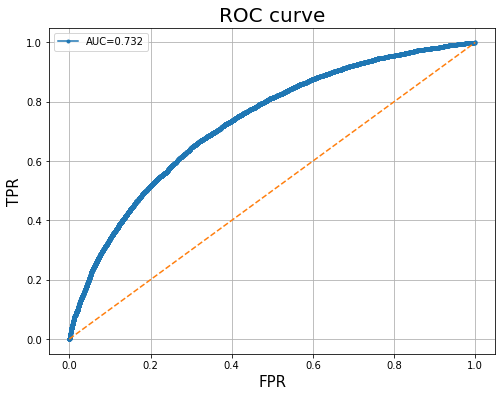

In [73]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test,y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC curve', fontsize = 20)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.grid()
plt.legend(["AUC=%.3f"%auc])
plt.show()

### 2. Random Forest Regression

In [74]:
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier(n_estimators = 500, random_state = 0).fit(X_train, y_train)

In [75]:
y_pred=cls.predict_proba(X_test)[:,1]
#roc_auc_score(y_test, y_pred)
roc_auc_score(y_test, y_pred)

0.7371386132993585

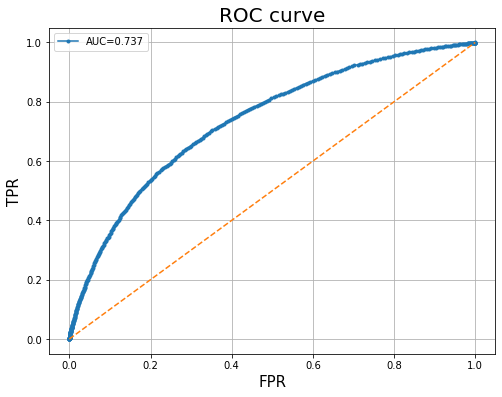

In [76]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test,y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC curve', fontsize = 20)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.grid()
plt.legend(["AUC=%.3f"%auc])
plt.show()

In [77]:
sub_1 = pd.DataFrame(application_test['SK_ID_CURR'])
sub_1['TARGET'] = cls.predict_proba(X_num)[:, 1]
sub_1.to_csv('Random_forest.csv', index = False)

### 3. Light Gradient Boosting Machine

In [78]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [79]:
y_pred=clf.predict_proba(X_test)[:,1]
y_pred

array([0.16563266, 0.26301963, 0.09896826, ..., 0.15475073, 0.59557612,
       0.52191728])

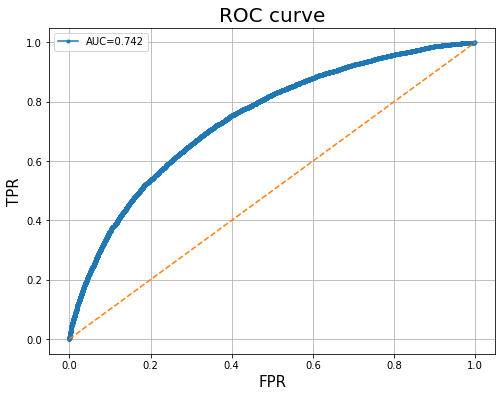

In [80]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test,y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC curve', fontsize = 20)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.grid()
plt.legend(["AUC=%.3f"%auc])
plt.show()

In [81]:
sub_1 = pd.DataFrame(application_test['SK_ID_CURR'])
sub_1['TARGET'] = clf.predict_proba(X_num)[:, 1]
sub_1.to_csv('LGBM.csv', index = False)

### 4. XGBoost 

In [82]:
import xgboost as xgb

xg_reg = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100).fit(X_train,y_train)
preds = xg_reg.predict_proba(X_test)[:,1]

[23:33:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


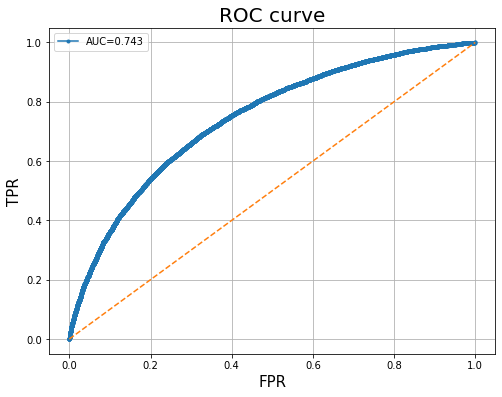

In [83]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,preds)
auc = roc_auc_score(y_test,preds)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC curve', fontsize = 20)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.grid()
plt.legend(["AUC=%.3f"%auc])
plt.show()

In [84]:
sub_1 = pd.DataFrame(application_test['SK_ID_CURR'])
sub_1['TARGET'] = xg_reg.predict_proba(X_num)[:, 1]
sub_1.to_csv('XGBoost.csv', index = False)